In [4]:
import pandas as pd
import json
import os

# Acá defino la ruta donde están guardados los archivos JSON. Decidí procesar todos los archivos que estuvieran 
# en esta carpeta porque mi idea es extraer la información completa, tanto de los restaurantes como del menú.
datos_obtenidos = "C:/Data Science Project1/data/capital_jsons"

# Esta función procesa un archivo JSON a la vez.
def procesar_json_completo(file_path):
    try:
        # Primero, abro el archivo JSON para cargar la información. Siempre uso un `try-except` por si hay errores, 
        # como un archivo que no exista o datos mal formateados.
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            
            # Aquí saco la información básica del establecimiento (nombre, tipo, dirección, etc.). 
            # Es importante tener esta base porque luego la combino con los datos del menú.
            establishment = data.get("establishment", {})
            base_info = {
                "Nombre": establishment.get("name", "No disponible"),
                "Tipo de Establecimiento": ", ".join(establishment.get("classification", {}).get("type", []) 
                                                     if establishment.get("classification") else []) or "No disponible",
                "Tipo de Cocina": ", ".join(establishment.get("cuisine", []) 
                                            if establishment.get("cuisine") else []) or "No disponible",
                "Dirección": establishment.get("address", "No disponible"),
                "Municipio": establishment.get("municipality", "No disponible"),
                "Provincia": establishment.get("province", "No disponible"),
                "Latitud": establishment.get("coordinates", {}).get("latitude", "No disponible") 
                           if establishment.get("coordinates") else "No disponible",
                "Longitud": establishment.get("coordinates", {}).get("longitude", "No disponible") 
                            if establishment.get("coordinates") else "No disponible",
                "Teléfono": establishment.get("contact_info", {}).get("phone", {}).get("number", "No disponible") 
                            if establishment.get("contact_info") else "No disponible",
                "Red Social": establishment.get("social_media", {}).get("facebook", "No disponible") 
                              if establishment.get("social_media") else "No disponible",
                "Métodos de Pago": ", ".join(establishment.get("accepted_payment_methods", []) 
                                             if establishment.get("accepted_payment_methods") else []) or "No disponible",
                "Delivery Disponible": "Sí" if establishment.get("delivery_available") else "No",
                "Servicio Adicional": establishment.get("service_fee", {}).get("description", "No aplica") 
                                      if establishment.get("service_fee") and establishment.get("service_fee").get("applies") else "No aplica",
                "Reservación Requerida": "Sí" if establishment.get("features", {}).get("reservation_required") else "No",
                "Estacionamiento": "Sí" if establishment.get("features", {}).get("parking") else "No",
                "Comidas Ofrecidas": ", ".join(establishment.get("meals", []) 
                                               if establishment.get("meals") else []) or "No disponible",
            }

            # Decidí almacenar todo lo relacionado con el menú de cada establecimiento en una lista separada.
            # Esto me permite combinar cada plato con la información básica del restaurante.
            resultado = []
            menu = data.get("menu", {})
            
            # Aquí recorro las categorías del menú y los platos dentro de cada categoría.
            for category in menu.get("categories", []):
                for item in category.get("items", []):
            # Extraigo los detalles de cada plato, como el nombre, precio, ingredientes y alergias.
                    menu_info = {
                        "Categoría": category.get("category", "No disponible"),
                        "Nombre Plato": item.get("name", "No disponible"),
                        "Precio": item.get("price", "No disponible"),
                        "Ingredientes Principales": ", ".join(item.get("essential_ingredients", []) 
                                                              if item.get("essential_ingredients") else []) or "No disponible",
                        "Alergias": ", ".join(item.get("allergy_info", []) 
                                              if item.get("allergy_info") else []) or "No disponible"
                    }
                    # Combino los datos del restaurante con los del plato.
                    resultado.append({**base_info, **menu_info})
            
            # Devuelvo la lista de resultados para este archivo JSON.
            return resultado

    except FileNotFoundError as e:
        # Por si me equivoco en la ruta del archivo.
        print(f"Archivo no encontrado: {file_path}")
        return []
    except json.JSONDecodeError:
        # Esto ocurre si el archivo no está en formato JSON válido.
        print(f"El archivo {file_path} no es un JSON válido.")
        return []
    except Exception as e:
        # Cualquier otro error inesperado.
        print(f"Error inesperado: {e}")
        return []

# Aquí es donde leo y proceso todos los archivos JSON de la carpeta.
# Decidí recorrer la carpeta con `os.listdir()` porque así puedo procesar varios archivos automáticamente.
datos_completos = []

for file_name in os.listdir(datos_obtenidos):
    # Solo me interesa procesar los archivos con extensión `.json`.
    if file_name.endswith('.json'):
        file_path = os.path.join(datos_obtenidos, file_name)
        # Voy agregando los resultados de cada archivo a la lista completa.
        datos_completos.extend(procesar_json_completo(file_path))

# Finalmente, convierto toda la información procesada en un DataFrame para poder analizarla mejor.
# Esto me permite trabajar con los datos de forma tabular, que es mucho más práctico para hacer análisis exploratorios.
datos_df = pd.DataFrame(datos_completos)


Error inesperado: 'NoneType' object has no attribute 'get'
Error inesperado: sequence item 2: expected str instance, list found


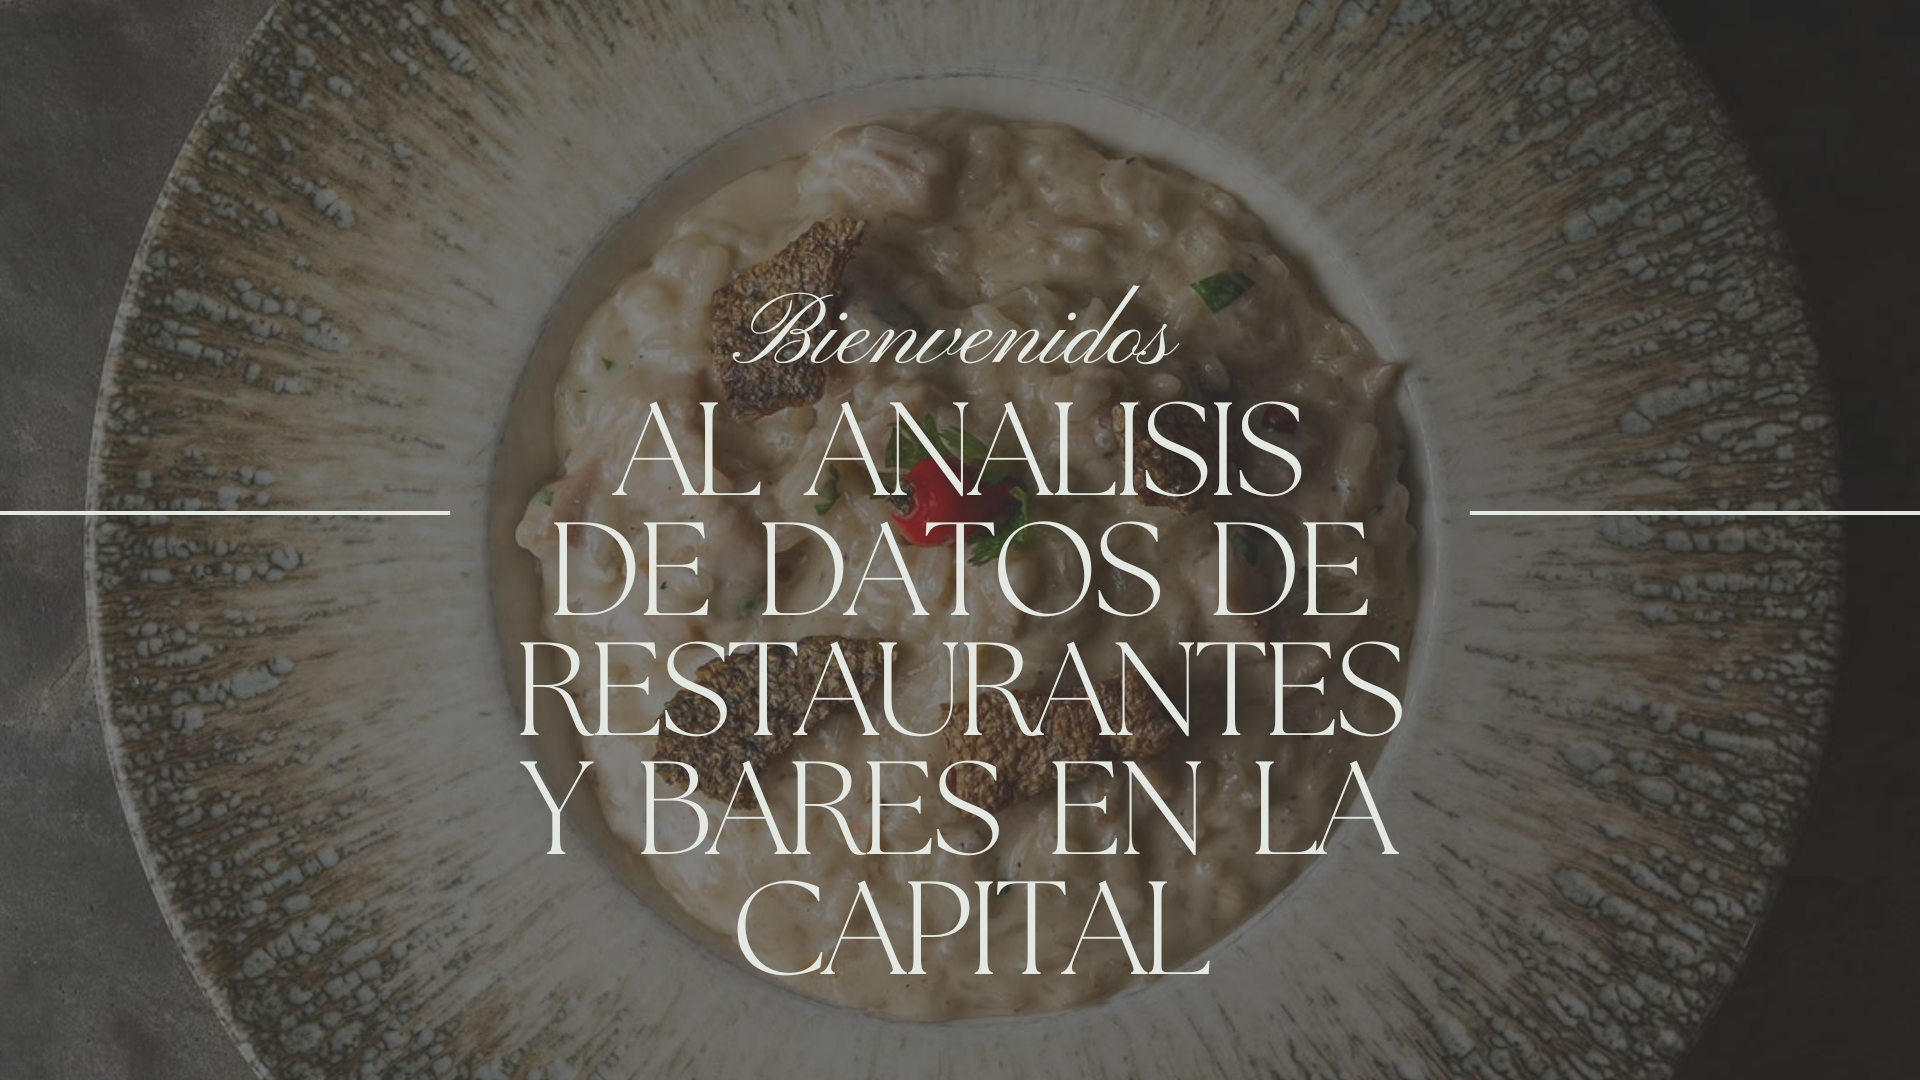

In [5]:
# Importe las herramientas necesarias para mostrar contenido HTML en Jupyter
from IPython.display import display, HTML

# CSS personalizado para el estilo en Jupyter
css_code = """
<style>
    /* Importo tipografías para un diseño limpio */
    @import url('https://fonts.googleapis.com/css2?family=Playfair+Display:wght@700&family=Raleway&display=swap');
    
    /* Estilo del cuerpo general */
    body {
        background-color: #f4f4f9; /* Fondo claro */
        color: #333; /* Texto oscuro */
        font-family: 'Raleway', sans-serif; /* Fuente principal */
        line-height: 1.6;
        margin: 0;
        padding: 0;
        overflow: hidden;
        height: 100vh;
        width: 100vw;
    }

    /* Contenedor principal */
    .contenido {
        max-width: 100%;
        height: 100%;
        margin: 0 auto;
        padding: 20px;
        background-color: #fff; /* Fondo blanco para destacar */
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); /* Sombra ligera */
        border-radius: 10px;
        transition: transform 0.3s ease-in-out;
    }

    /* Párrafos de descripción */
    .descripcion {
        font-size: 1.4em;
        line-height: 1.8;
        text-align: justify;
        margin: 20px 0;
        opacity: 0;
        transform: translateY(30px);
        animation: fadeInUp 1s forwards; /* Animación */
    }

    /* Subtítulo destacado */
    .subtitulo {
        font-size: 1.6em;
        font-weight: bold;
        color: #6B4F4F;
        text-align: center;
        margin-top: 40px;
        opacity: 0;
        transform: translateY(30px);
        animation: fadeInUp 1s forwards;
    }

    /* Líneas divisorias */
    hr {
        border: 0;
        height: 1px;
        background: linear-gradient(to right, #6B4F4F, #f4f4f9, #6B4F4F);
        margin: 20px 0;
    }

    /* Animación de entrada */
    @keyframes fadeInUp {
        0% { opacity: 0; transform: translateY(30px); }
        100% { opacity: 1; transform: translateY(0); }
    }
</style>
"""

## Aquí generé un bloque de contenido HTML con estilo para mostrar la información de manera atractiva
html_code = """
<div class="contenido">
    <p class="descripcion animated fadeInUp">
        La vibrante historia y riqueza cultural de Cuba han dado lugar a una gastronomía única que ha sabido adaptarse y evolucionar con el tiempo.
        Tradiciones africanas, españolas y caribeñas se mezclan con influencias internacionales, creando una oferta culinaria diversa y moderna.
    </p>
    <hr>
    <p class="descripcion animated fadeInUp">
        Este proyecto analiza más de 200 restaurantes y bares distribuidos en los 15 municipios de La Habana, utilizando herramientas de ciencia de datos y programación.
        El objetivo es ofrecer una perspectiva profunda del panorama culinario de la capital, destacando su riqueza, diversidad y evolución.
    </p>
</div>
"""

## Finalmente, combino el CSS con el contenido HTML y lo muestro en Jupyter
display(HTML(css_code + html_code))


c:\Data Science Project1\notebooks\graficosmunicipal.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


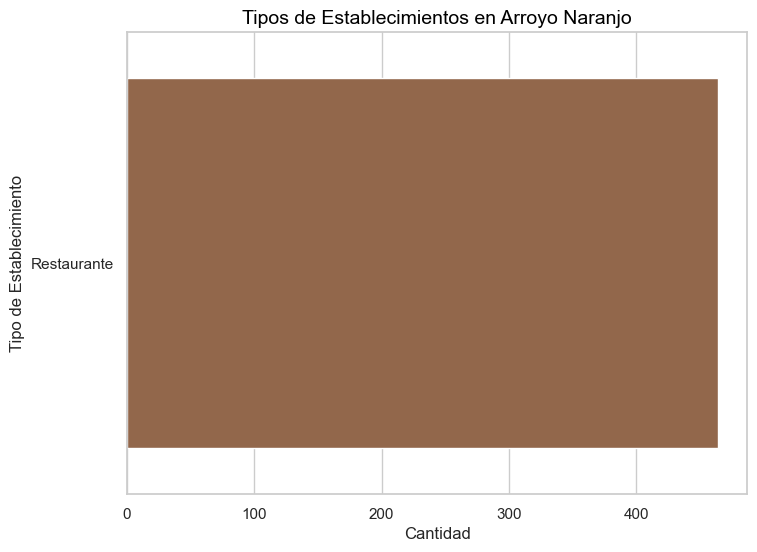

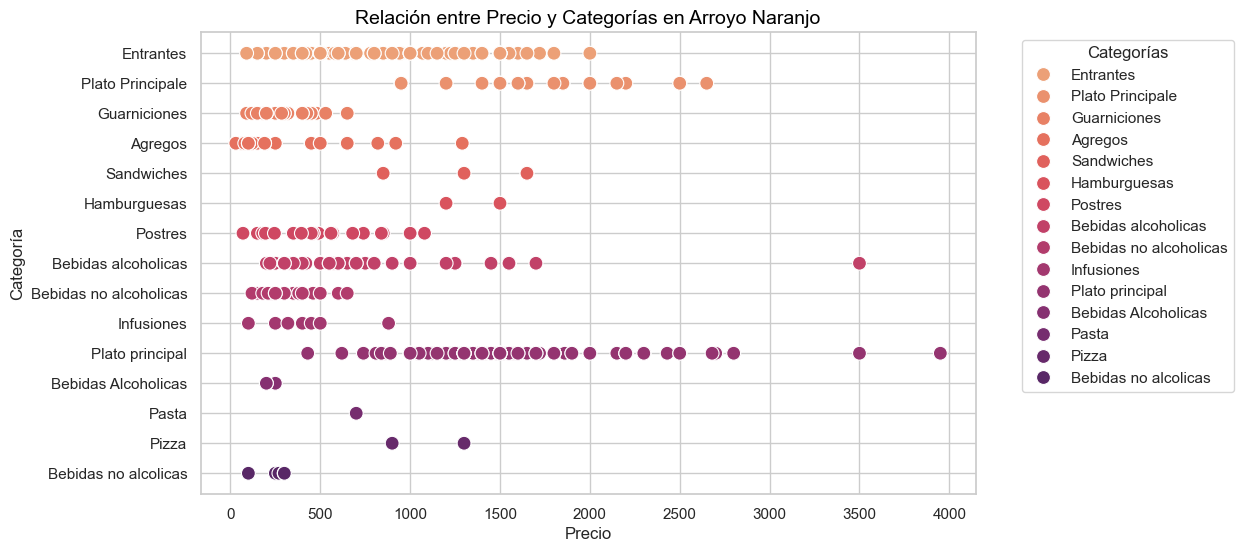

AttributeError: module 'graficosmunicipal' has no attribute 'graficar_porcentaje_10'

In [6]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

# Estilo CSS para mejorar la presentación del análisis y las gráficas
css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

# Generé un análisis textual sobre los datos del municipio proporcionado
def generar_analisis_textual(df, municipio):
    """
    Generé un análisis textual sobre los datos del municipio proporcionado.
    - df: DataFrame con los datos de análisis.
    - municipio: Nombre del municipio a analizar.
    """
    # Llamé a las funciones del módulo `abs` para obtener datos específicos del análisis
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    # Creé un bloque de texto para el análisis usando HTML y CSS
    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los 15 municipios que conforman la provincia de La Habana, Cuba. Geográficamente ubicado en la parte suroeste de la ciudad, su extensión territorial lo convierte en uno de los municipios de mayor superficie en la capital cubana. Este municipio es notable por su diversidad cultural y social, que refleja la riqueza patrimonial de la región. En sus barrios históricos, como Calabazar, Mantilla, Poey, y Arroyo Naranjo, se pueden apreciar muestras de la arquitectura colonial y republicana, las cuales coexisten armoniosamente con desarrollos urbanos más modernos.
            <br><br>
            Los restaurantes en Arroyo Naranjo ofrecen una amplia gama de opciones culinarias, que incluyen desde la tradicional comida cubana hasta platos internacionales. Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías diferentes de platos.
            <br><br>
            El servicio de entrega a domicilio (delivery) en el municipio es usado por <strong>{deliv}</strong>% de los establecimientos. 
            <br><br>
            El ingrediente más común es <strong>{ing_com}</strong>, y la alergia más frecuente observada en los platos es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        </p>
    </div>
    """
    # Mostré el análisis con el estilo CSS
    display(HTML(css_code + texto_analisis))

# Generé gráficos explicativos sin incluir texto entre ellos
def generar_analisis_con_graficas(df, municipio):
    """
    Generé gráficos explicativos sobre los datos del municipio.
    - df: DataFrame con los datos de análisis.
    - municipio: Nombre del municipio a analizar.
    """
    # Llamé a las funciones del módulo `graficosmunicipal` para crear gráficas
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)
    gr.graficar_porcentaje_10(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

# Mostré análisis textual y gráficas
municipio = "Arroyo Naranjo"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

# Escribí las conclusiones según el análisis
display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
       Dado que el número mínimo requerido para un análisis significativo es de 30, nuestras conclusiones son limitadas debido a que solo se pudo acceder a datos de 10 establecimientos. Sin embargo, incluso con esta muestra pequeña, se puede extraer información interesante al realizar un análisis profundo.
       <br><br>
       Arroyo Naranjo, aunque es uno de los municipios más grandes en términos de territorio, cuenta con uno de los menores números de establecimientos gastronómicos para analizar. Esto revela un patrón importante: en La Habana, la mayor concentración de establecimientos se encuentra en municipios más pequeños pero más transitados. Esto sugiere que la ubicación y el tráfico de personas en la zona influyen notablemente en la cantidad de restaurantes y bares.
       <br><br>
       Además, nuestro análisis muestra que el plato más frecuente en estos establecimientos son las fajitas de pollo. Esto evidencia una variación en el patrón de consumo de alimentos. Anteriormente, el cerdo era la carne más común en los menús; sin embargo, ha sido reemplazado por el pollo debido a factores como las importaciones de pollo y la escasez de cerdo, vinculada a la disminución de pienso disponible para su crianza.
    </p>
</div>
"""))



c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


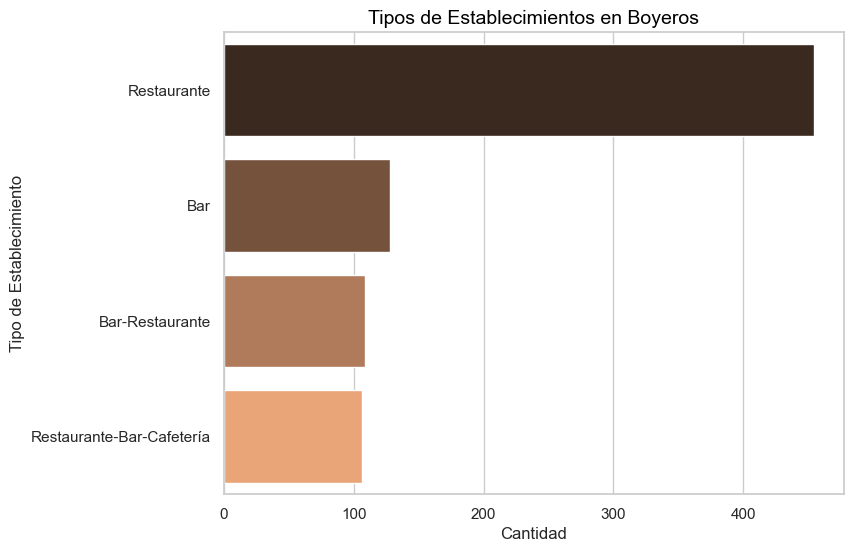

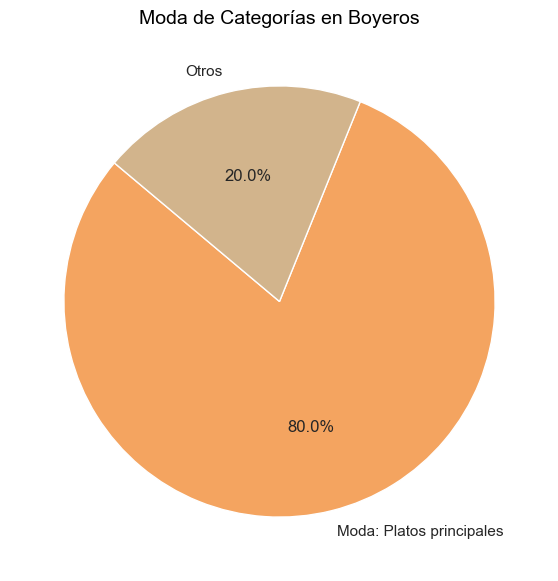

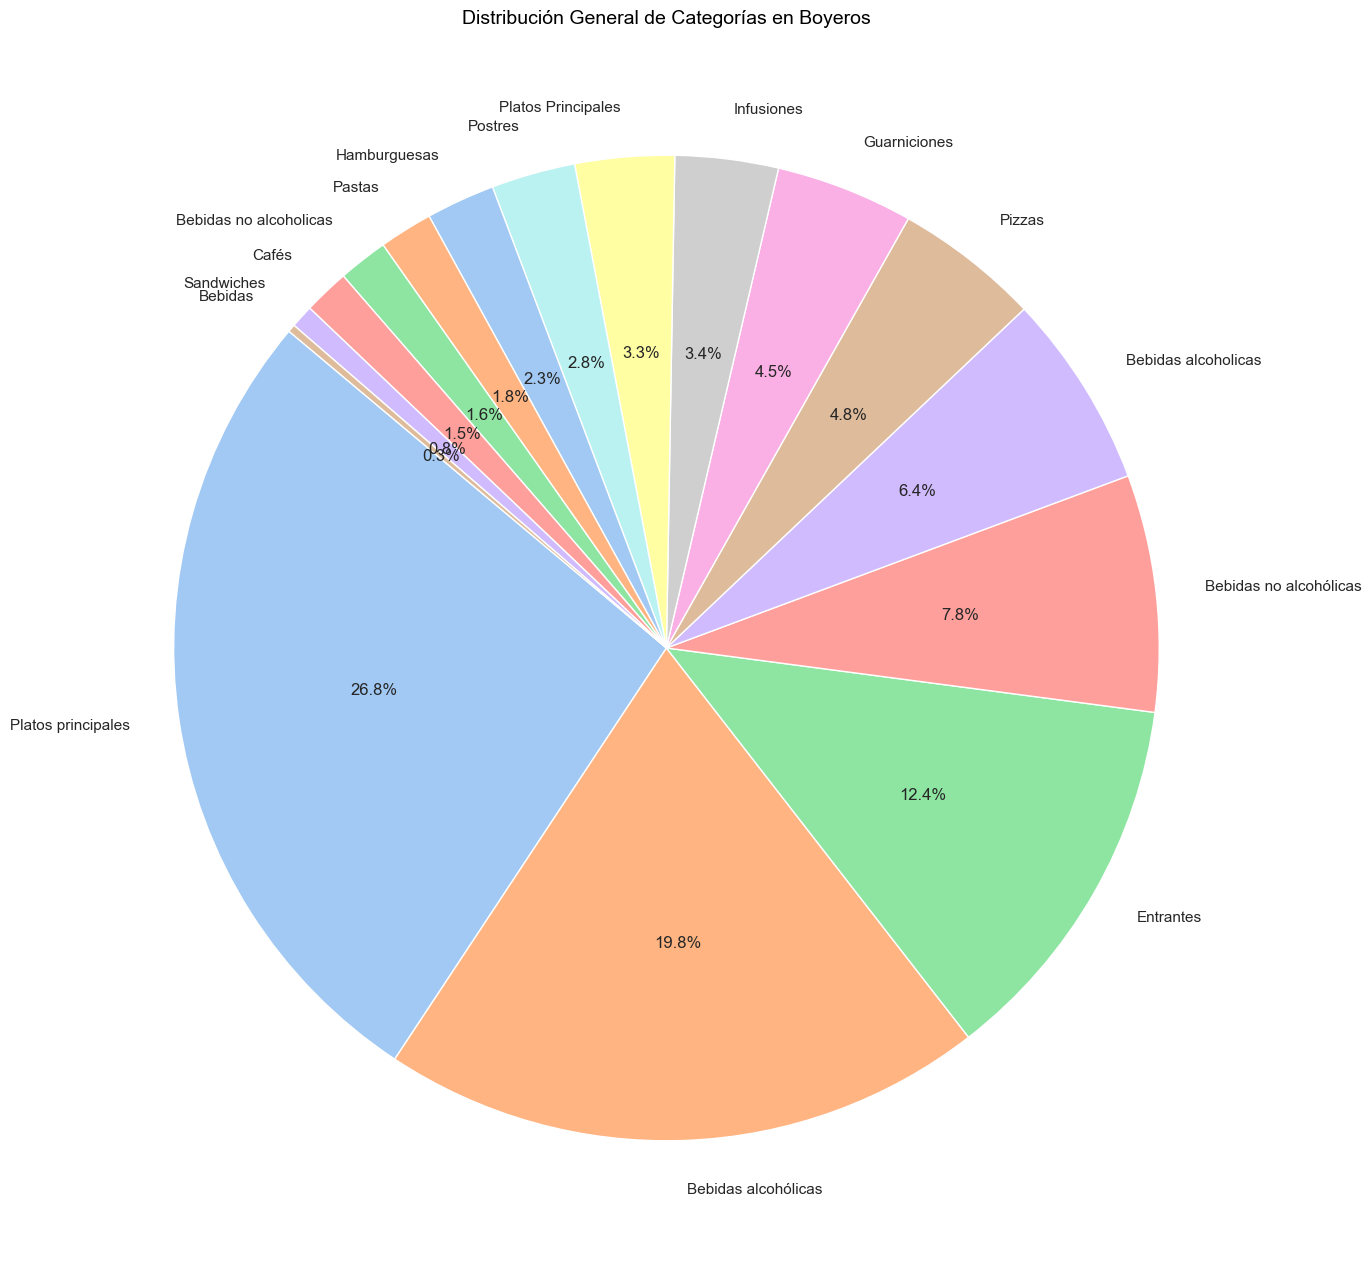

In [458]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios que conforman la provincia de La Habana, Cuba. Ubicado en el suroeste de la capital, Boyeros se distingue por su importante papel en la conectividad de la ciudad debido a la presencia del Aeropuerto Internacional José Martí, el principal aeropuerto de Cuba.
            Boyeros es conocido por su diversidad de barrios, entre los que se encuentran Santiago de Las Vegas, Rancho Boyeros, Calabazar, y Altahabana, cada uno con su propio carácter y encanto. Estos barrios ofrecen una mezcla vibrante de vida urbana y rural, con áreas verdes, parques y numerosos campos agrícolas que dan una sensación distintiva de espacio abierto dentro de la metrópoli.
             Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Boyeros"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
       Para concluir nuestro análisis de datos sobre los establecimientos gastronómicos en Boyeros, hemos identificado varios patrones y tendencias significativas:
En comparación con otros municipios, Boyeros muestra una notable predominancia de comida cubana y criolla. Este patrón es especialmente interesante ya que en otros municipios la oferta principal suele incluir platos como pastas y pizzas. Este enfoque en la comida local puede ser un reflejo del valor cultural y gastronómico de Boyeros.
La ubicación estratégica de Boyeros cerca del Aeropuerto Internacional José Martí juega un papel crucial en la configuración de su oferta gastronómica. La cercanía al aeropuerto significa que una gran cantidad de turistas y viajeros frecuentan este municipio, lo que podría explicar la prominencia de la cocina cubana y criolla. Los establecimientos pueden estar enfocándose en ofrecer una experiencia auténtica y representativa de la gastronomía local para atraer a los visitantes.
A medida que Cuba continúa aumentando su flujo turístico, es probable que Boyeros siga desempeñando un papel importante como punto de entrada y salida del país. Este aumento del turismo tiene implicaciones positivas para la economía local, destacando la necesidad de mantener y mejorar la oferta gastronómica. La cocina cubana y criolla en Boyeros no solo satisface a los habitantes locales sino también a los turistas que buscan una inmersión cultural a través de la comida.
En resumen, nuestro análisis destaca la importancia de Boyeros como un centro gastronómico con un enfoque distintivo en la comida cubana y criolla. Este patrón, influenciado en gran medida por su proximidad al aeropuerto, subraya la relación entre la ubicación estratégica y las tendencias de consumo y oferta gastronómica. A medida que el turismo en Cuba sigue creciendo, Boyeros continuará siendo un punto de referencia clave para la gastronomía local, beneficiándose de la afluencia constante de visitantes.
    </p>
</div>
"""))



c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


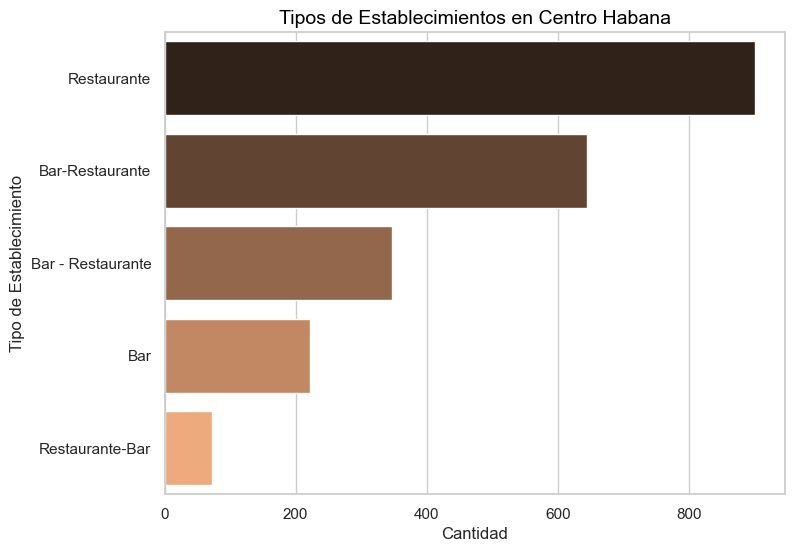

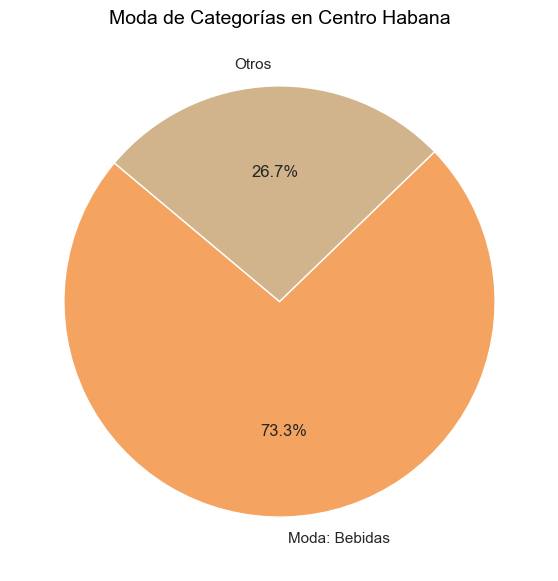

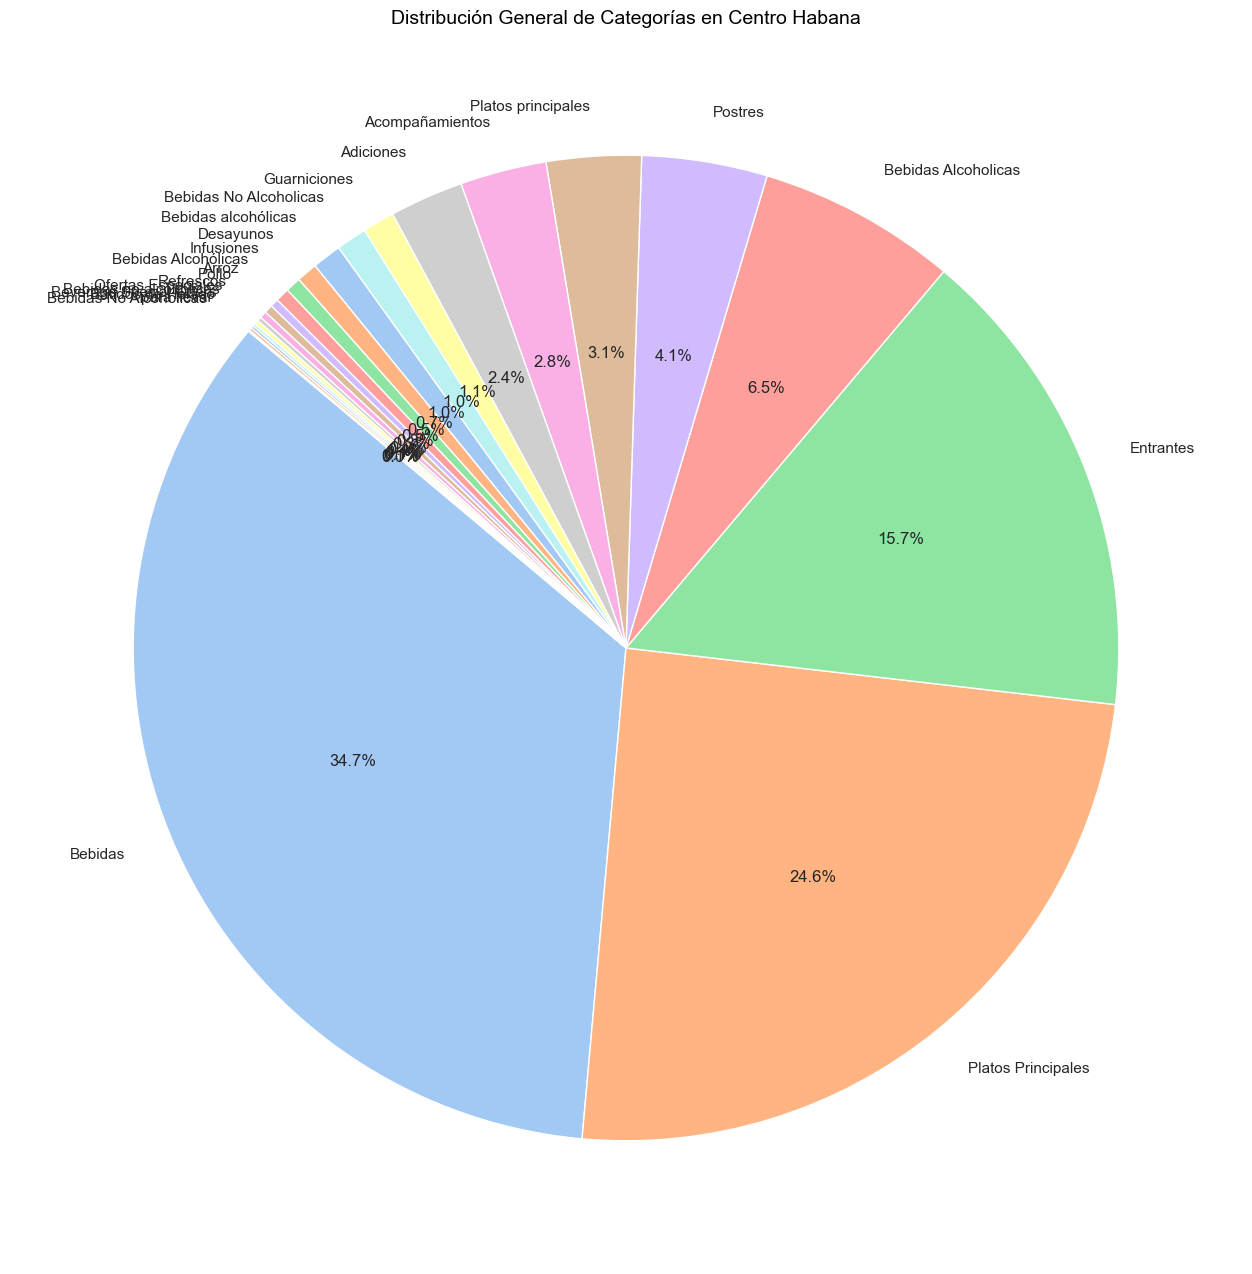

In [459]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios más pequeños en términos de territorio, pero se destaca por ser el más densamente poblado de la capital cubana. Ubicado en el corazón de La Habana, Centro Habana es un lugar de convergencia cultural y social, famoso por su vibrante vida urbana
             Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Centro Habana"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
      Nuestro análisis de datos en Centro Habana alcanzó el número mínimo requerido de 30 establecimientos, lo que nos permite extraer conclusiones significativas sobre el panorama gastronómico de este dinámico municipio.
Uno de los hallazgos más destacados es el predominio de la comida china en Centro Habana. Este fenómeno se debe principalmente al icónico Barrio Chino, situado en este municipio. Durante décadas, el Barrio Chino ha sido un centro cultural y gastronómico donde los habitantes y visitantes podían disfrutar de auténticos sabores chinos, lo que ha dejado una huella indeleble en la identidad gastronómica de Centro Habana.
Sin embargo, hemos observado una disminución en la prevalencia de la cocina china con el pasar de los años. Este declive está relacionado con la disminución de la inmigración china al país, lo que ha reducido la influencia directa de esta cultura en la vida cotidiana de Centro Habana. Antes, el Barrio Chino era un bullicioso enclave lleno de restaurantes y tiendas que ofrecían una variedad de productos y platos tradicionales.
Pese a este descenso, el legado de la comida china sigue siendo parte integral de la identidad de La Habana. Aunque menos frecuente, aún es posible encontrar restaurantes que rinden homenaje a esta rica tradición culinaria. Es reconfortante ver cómo los habitantes locales y los visitantes siguen recordando y apreciando la influencia histórica de la cultura china en la gastronomía habanera.
En resumen, Centro Habana no solo destaca por su densidad poblacional, sino también por su importante herencia cultural en el ámbito gastronómico. Mientras que la comida china ha disminuido en su presencia, sigue siendo un símbolo de la diversidad y la riqueza cultural de La Habana. La preservación y el reconocimiento de estas tradiciones culinarias son esenciales para mantener viva la identidad histórica y cultural del municipio.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


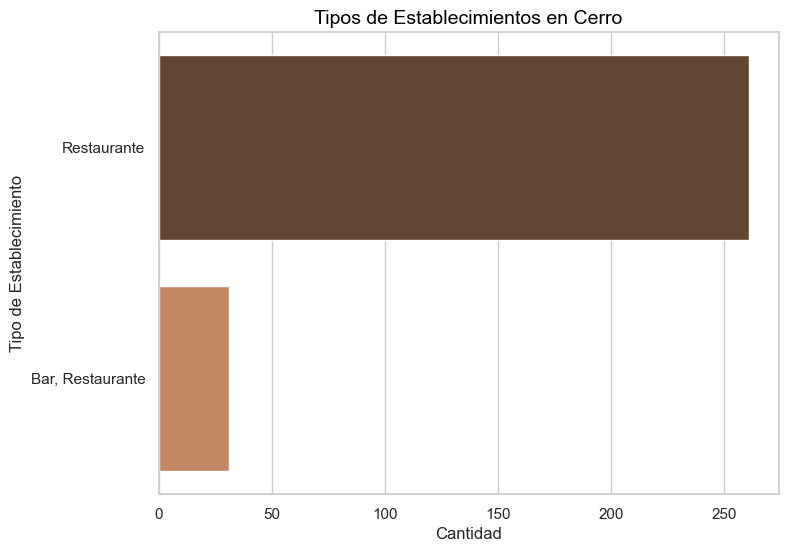

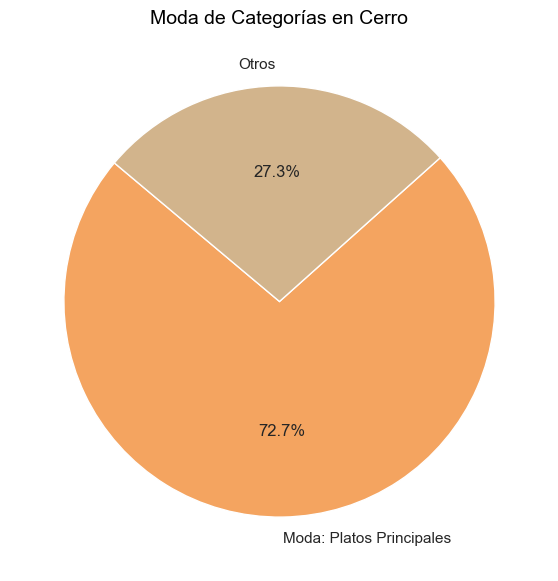

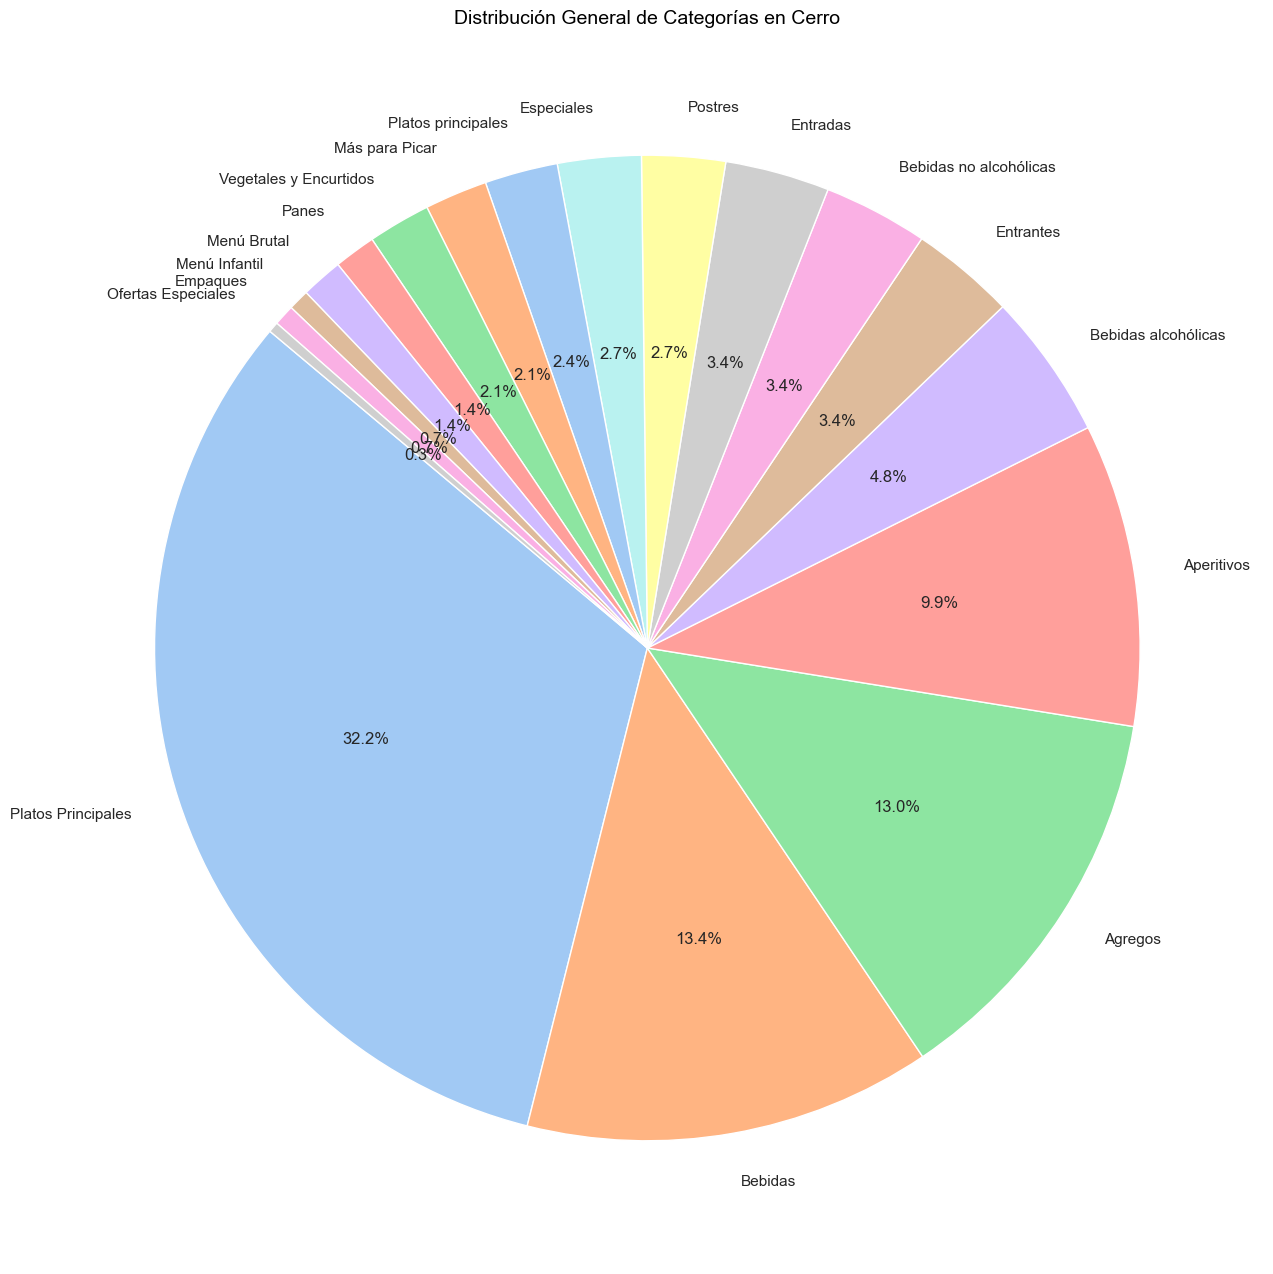

In [460]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs


css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios históricos de la provincia de La Habana, Cuba. Situado al oeste del centro de la ciudad, El Cerro es conocido por su rica herencia cultural y arquitectónica, con numerosos edificios de estilo colonial y republicano que narran la historia vibrante de La Habana.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Cerro"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
       Nuestro análisis de datos sobre los establecimientos gastronómicos en El Cerro muestra una notable diversidad culinaria, con una predominancia de restaurantes que se destacan por ser accesibles y convenientes. Las condiciones socioeconómicas del municipio se reflejan en la cantidad y tipos de establecimientos disponibles, evidenciando un enfoque más local y comunitario en comparación con municipios turísticos. Los datos también revelan que la mayoría de estos establecimientos se concentran en áreas clave más transitadas y accesibles, sugiriendo que ciertos sectores del municipio ofrecen un mayor atractivo tanto para los negocios como para los consumidores, influyendo en la dinámica y distribución de la oferta gastronómica.
    </p>
</div>
"""))



c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


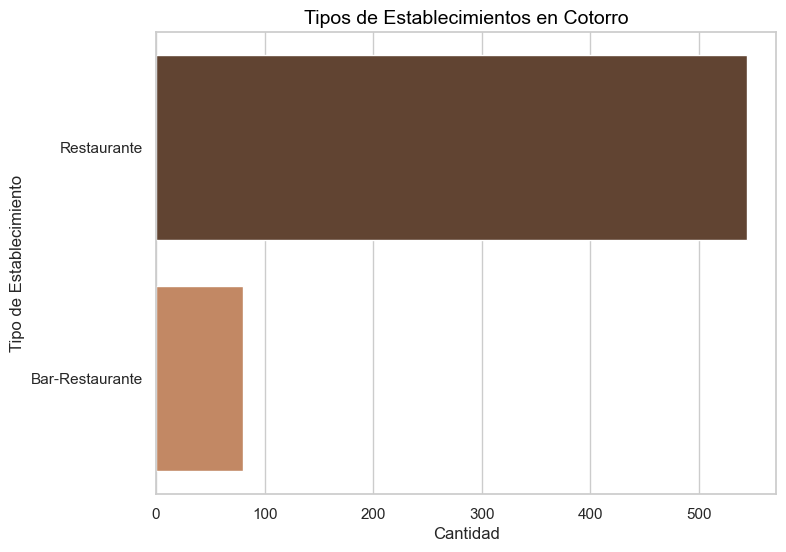

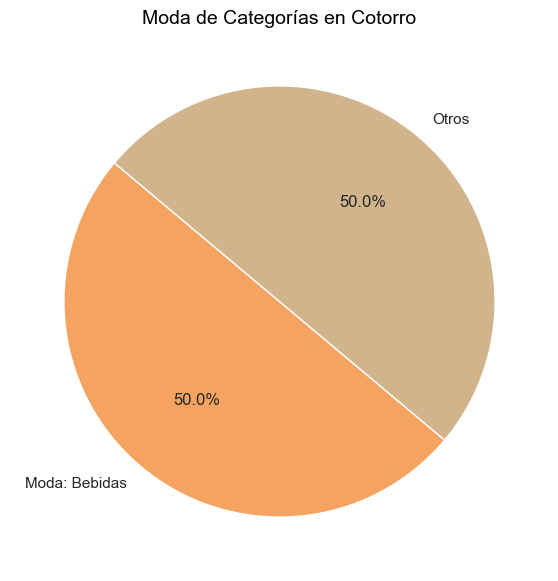

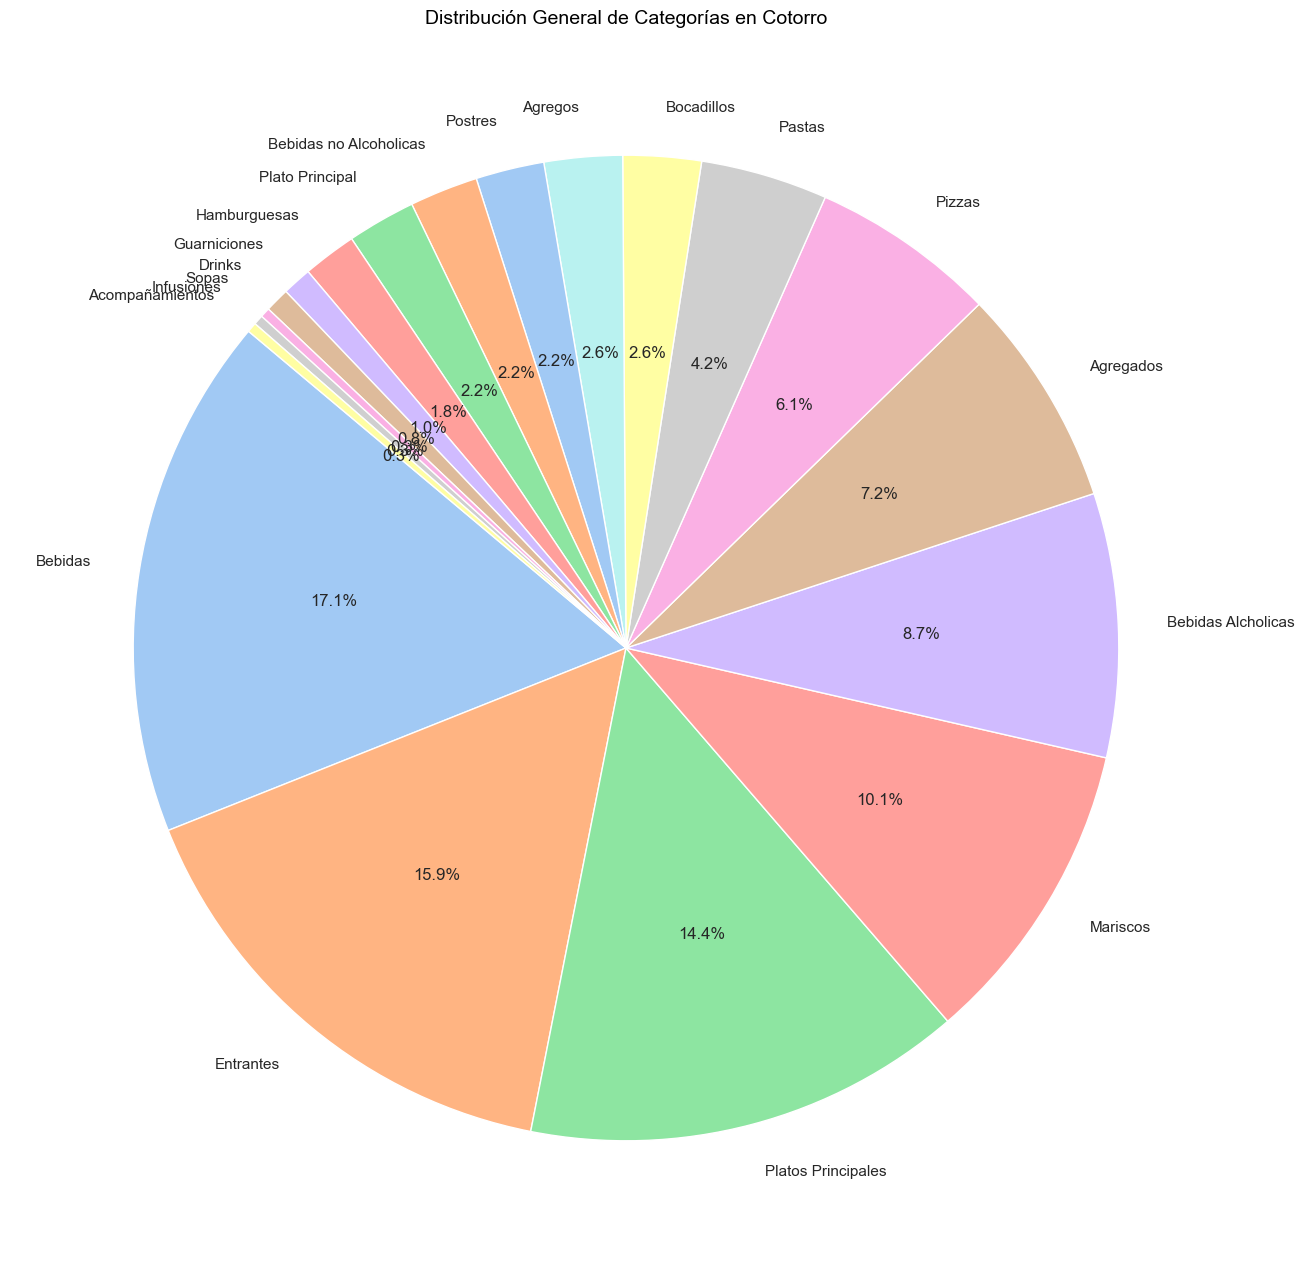

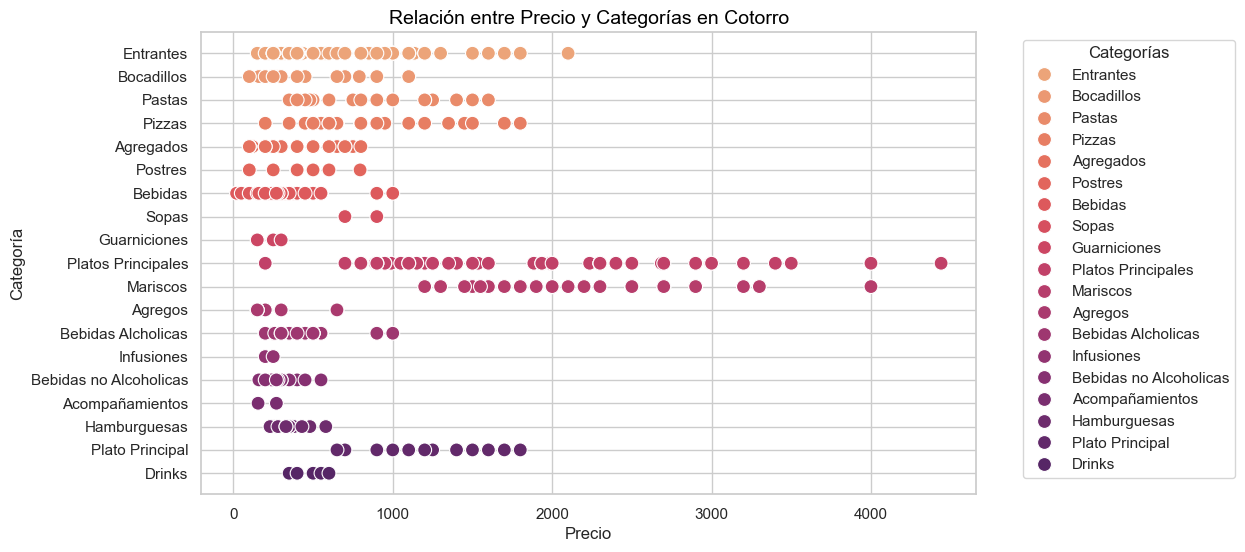

In [461]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios de la provincia de La Habana, Cuba, conocido por su equilibrada mezcla de vida urbana y rural. Situado en la periferia sureste de la capital, El Cotorro se distingue por sus paisajes naturales y su tranquilo ambiente residencial. Este municipio ofrece una interesante combinación de áreas industriales y rurales, siendo hogar de muchas fábricas y empresas que impulsan la economía local.
          El Cotorro es conocido también por sus espacios verdes y parques, que proporcionan a los residentes y visitantes un lugar para el esparcimiento y la recreación. Barrios como Santa María del Rosario y Central Toledo destacan por su carácter histórico y cultural, conservando un encanto pintoresco que atrae a aquellos que buscan explorar más allá del bullicio del centro de la ciudad.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)

municipio = "Cotorro"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
    Nuestro análisis de datos sobre los establecimientos gastronómicos en El Cotorro revela varios patrones interesantes.El precio más frecuente (moda) en los menús de los establecimientos en El Cotorro es de 400 pesos, siendo uno de los índices más bajos de la capital. Este factor económico subraya la accesibilidad de la oferta gastronómica del municipio, en comparación con otros municipios de la capital. Además, los agregos son los platos más frecuentemente observados en los menús. Esto se debe principalmente a la gran cantidad de establecimientos que ofrecen pizzas y otros platos similares, reflejando las preferencias culinarias de la comunidad.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


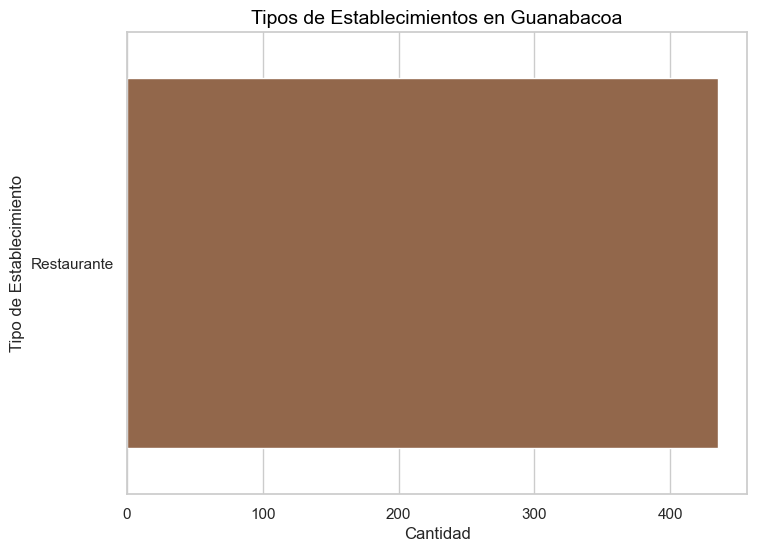

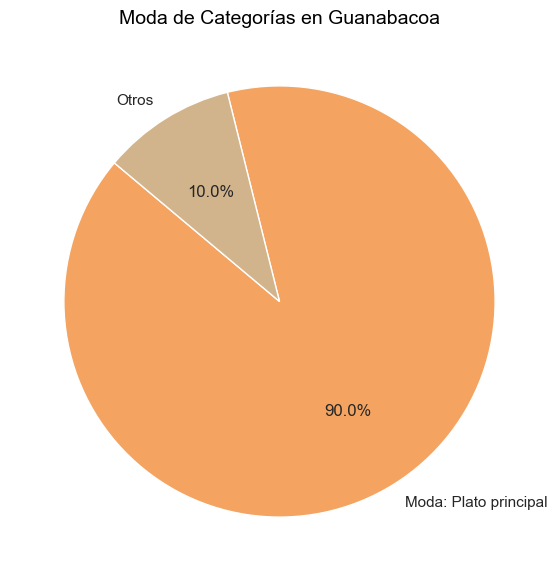

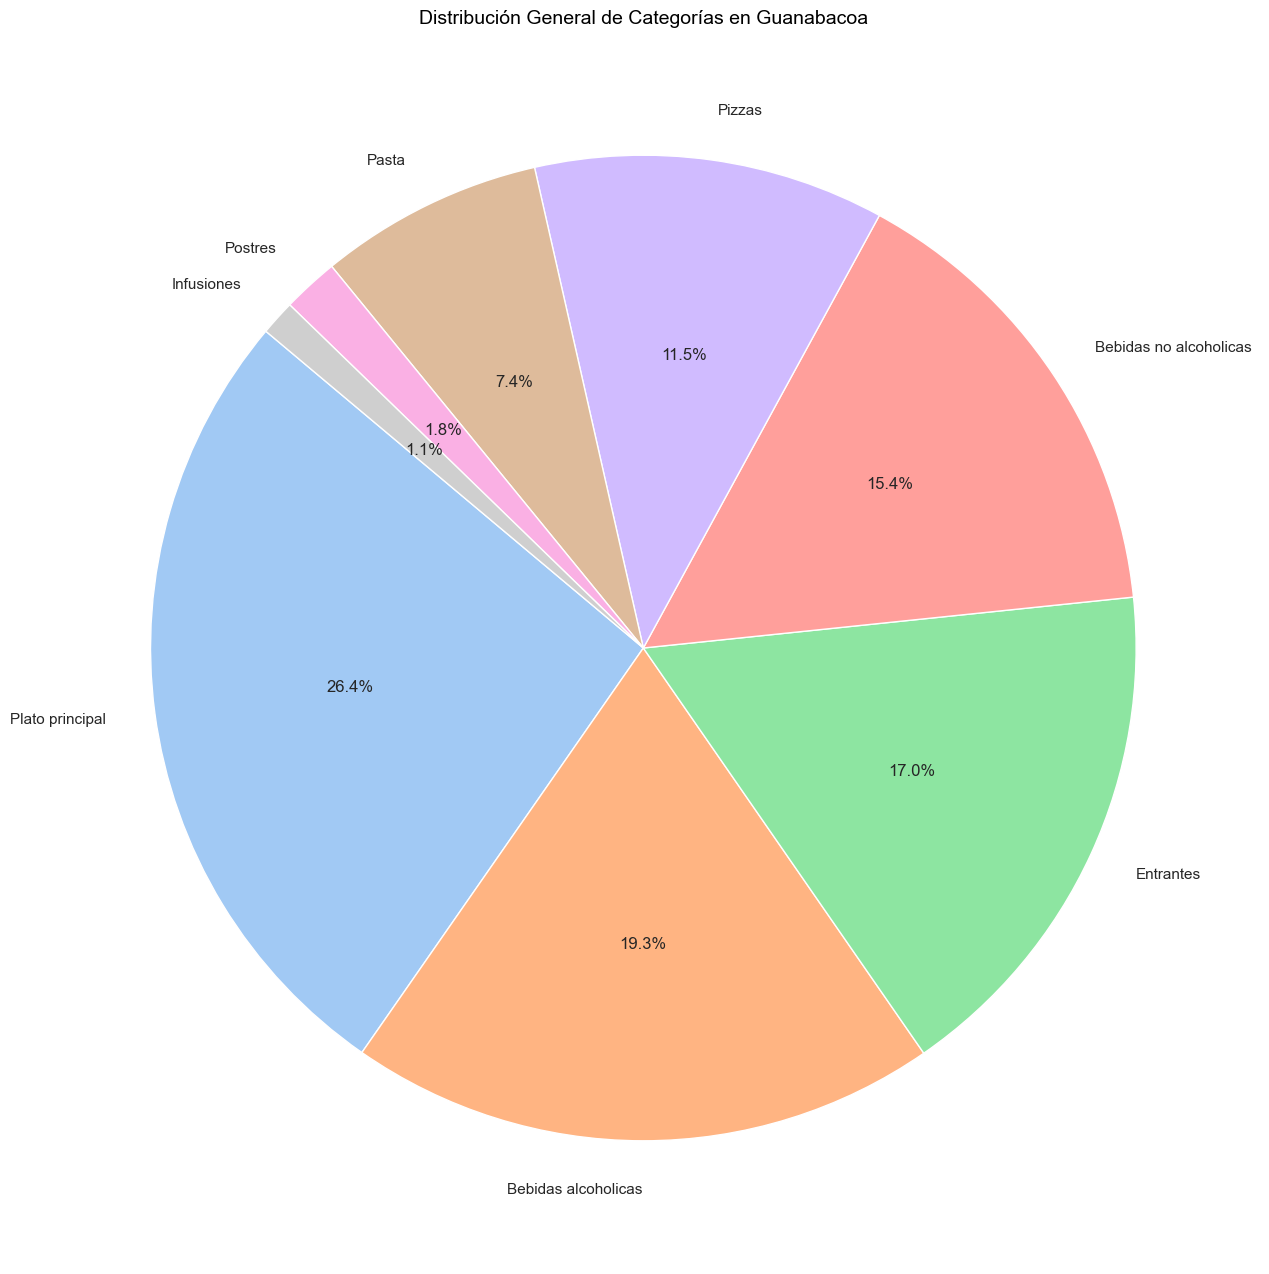

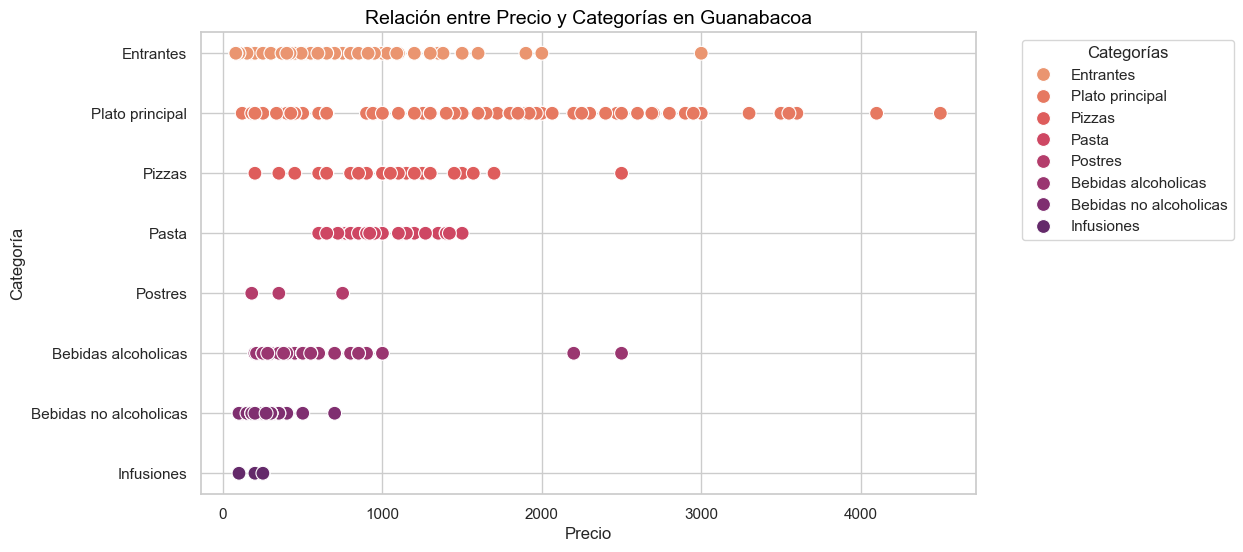

In [462]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs


css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es un municipio situado en la parte oriental de La Habana, Cuba, conocido por su rica historia y tradiciones culturales. Fundado en el siglo XVI, Guanabacoa ha sido testigo de importantes acontecimientos históricos y conserva un legado que se refleja en sus calles, edificios y en la vida diaria de sus habitantes.
            El municipio es famoso por su vibrante cultura y tradiciones, destacándose por sus festividades religiosas y prácticas folclóricas. Guanabacoa es también hogar de numerosos sitios históricos y culturales, como la Iglesia de la Asunción y el Museo Municipal, que ofrecen un vistazo al pasado y al patrimonio del municipio.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)

municipio = "Guanabacoa"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
    Nuestro análisis sobre los establecimientos gastronómicos de Guanabacoa revela un aspecto interesante y es que el agua aparece como la opción más común en los menús de los establecimientos. La prominencia del agua en los menús de Guanabacoa puede reflejar varias tendencias. En primer lugar, esto podría indicar que los consumidores locales priorizan opciones asequibles y esenciales, dado que el agua es un elemento básico. Además, la opción de agua en los menús podría ser una respuesta a la demanda de los consumidores que buscan mantenerse hidratados y saludables, especialmente en un clima tropical donde la hidratación es crucial. También sugiere que los restaurantes en Guanabacoa están adaptándose a las necesidades y preferencias de sus clientes, integrando opciones simples pero vitales en sus ofertas. En resumen, la aparición frecuente del agua en los menús de Guanabacoa es un patrón de comportamiento que refleja las condiciones locales y las preferencias de consumo en este municipio. Esta tendencia, aunque inusual, ofrece una perspectiva interesante sobre la accesibilidad y la estrategia de costos en la gastronomía de Guanabacoa.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


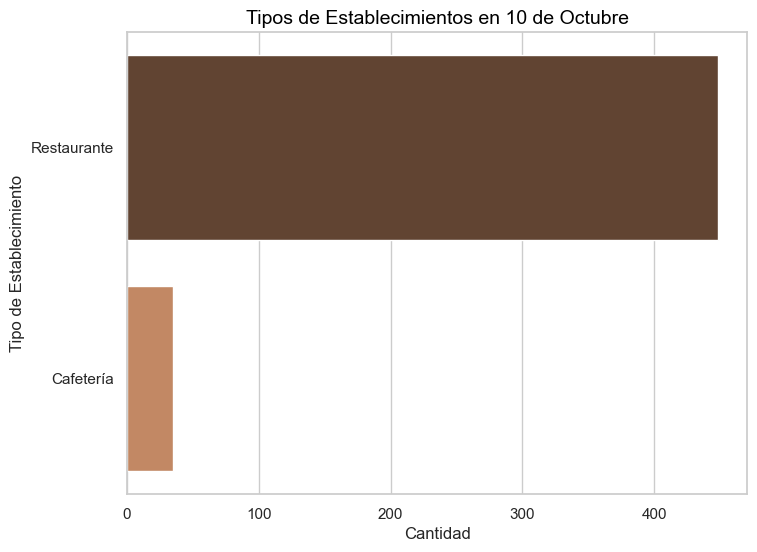

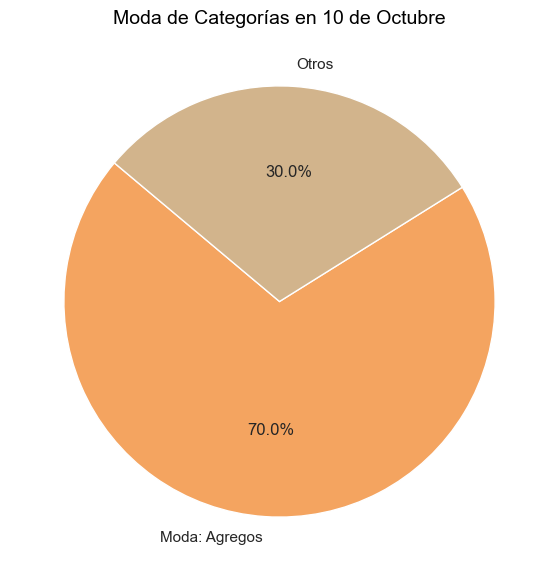

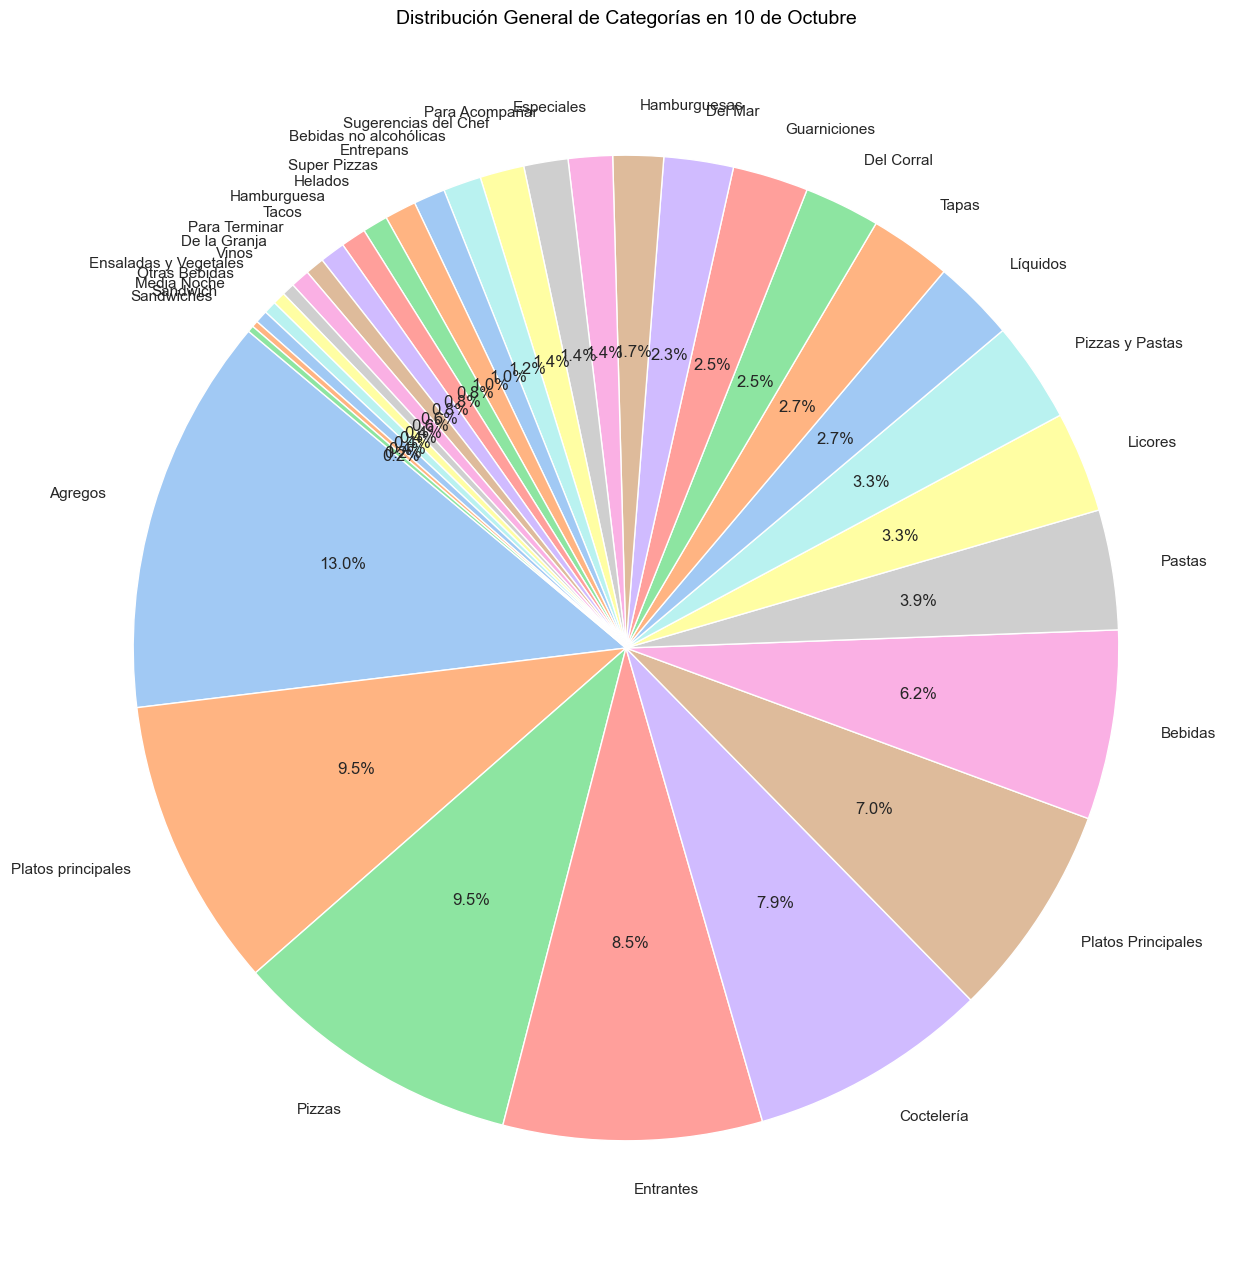

In [463]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios más dinámicos de La Habana, Cuba. Ubicado estratégicamente entre otros municipios capitalinos, Diez de Octubre se caracteriza por su continuo flujo de personas y actividad constante. Este municipio es un importante punto de conexión en la ciudad, facilitando el tránsito y la movilidad de sus habitantes y visitantes.
Diez de Octubre combina áreas residenciales con espacios comerciales y servicios, creando un entorno vibrante y activo. Su ubicación estratégica lo convierte en un lugar clave para el comercio y la interacción social, haciendo que la vida en este municipio sea siempre animada y en movimiento.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "10 de Octubre"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en Diez de Octubre revela varios patrones interesantes. Dado su posicionamiento geográfico y su naturaleza como un municipio de alto flujo, se observa una predominancia de comidas rápidas, aunque estas sean ofrecidas en restaurantes, lo cual es comprensible ya que la constante afluencia de personas, tanto locales como visitantes, crea una demanda por opciones de comida que sean rápidas y convenientes.
Estas comidas rápidas incluyen pizzas, bocadillos y platos ligeros, que son fáciles de preparar y consumir en movimiento. La rapidez y accesibilidad de estos alimentos los hace ideales para un entorno tan dinámico como Diez de Octubre. Además, estas opciones no solo satisfacen el hambre de forma eficiente, sino que también se alinean con las necesidades de quienes tienen un estilo de vida acelerado debido al flujo constante en este municipio.
En resumen, la oferta gastronómica de Diez de Octubre refleja su naturaleza como un municipio de gran flujo. La predominancia de comidas rápidas, incluso en restaurantes, es una respuesta directa a las demandas y necesidades de una población en constante movimiento. Este patrón de consumo destaca la adaptabilidad y eficiencia de los establecimientos gastronómicos de Diez de Octubre, que se esfuerzan por satisfacer las expectativas de una comunidad siempre activa y en tránsito.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


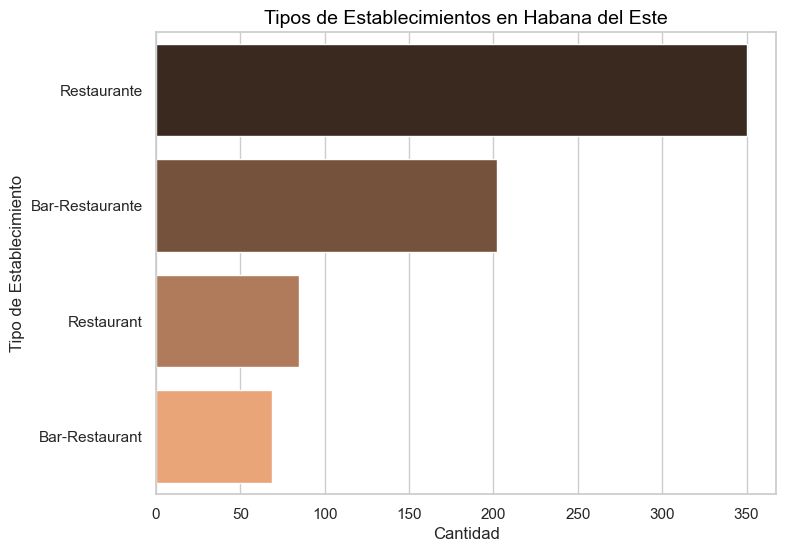

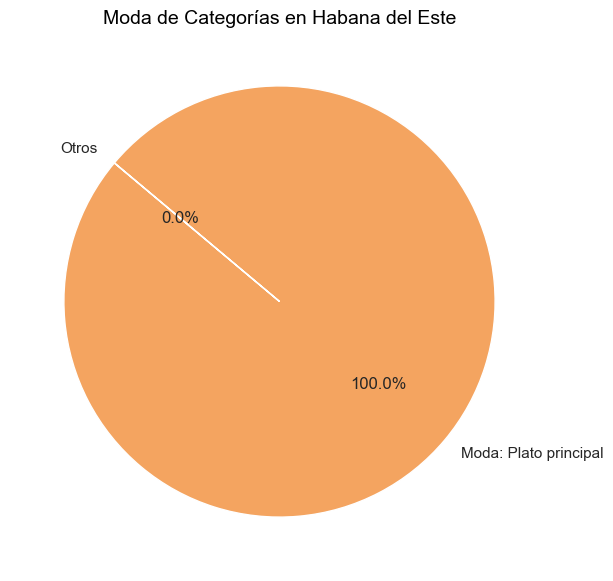

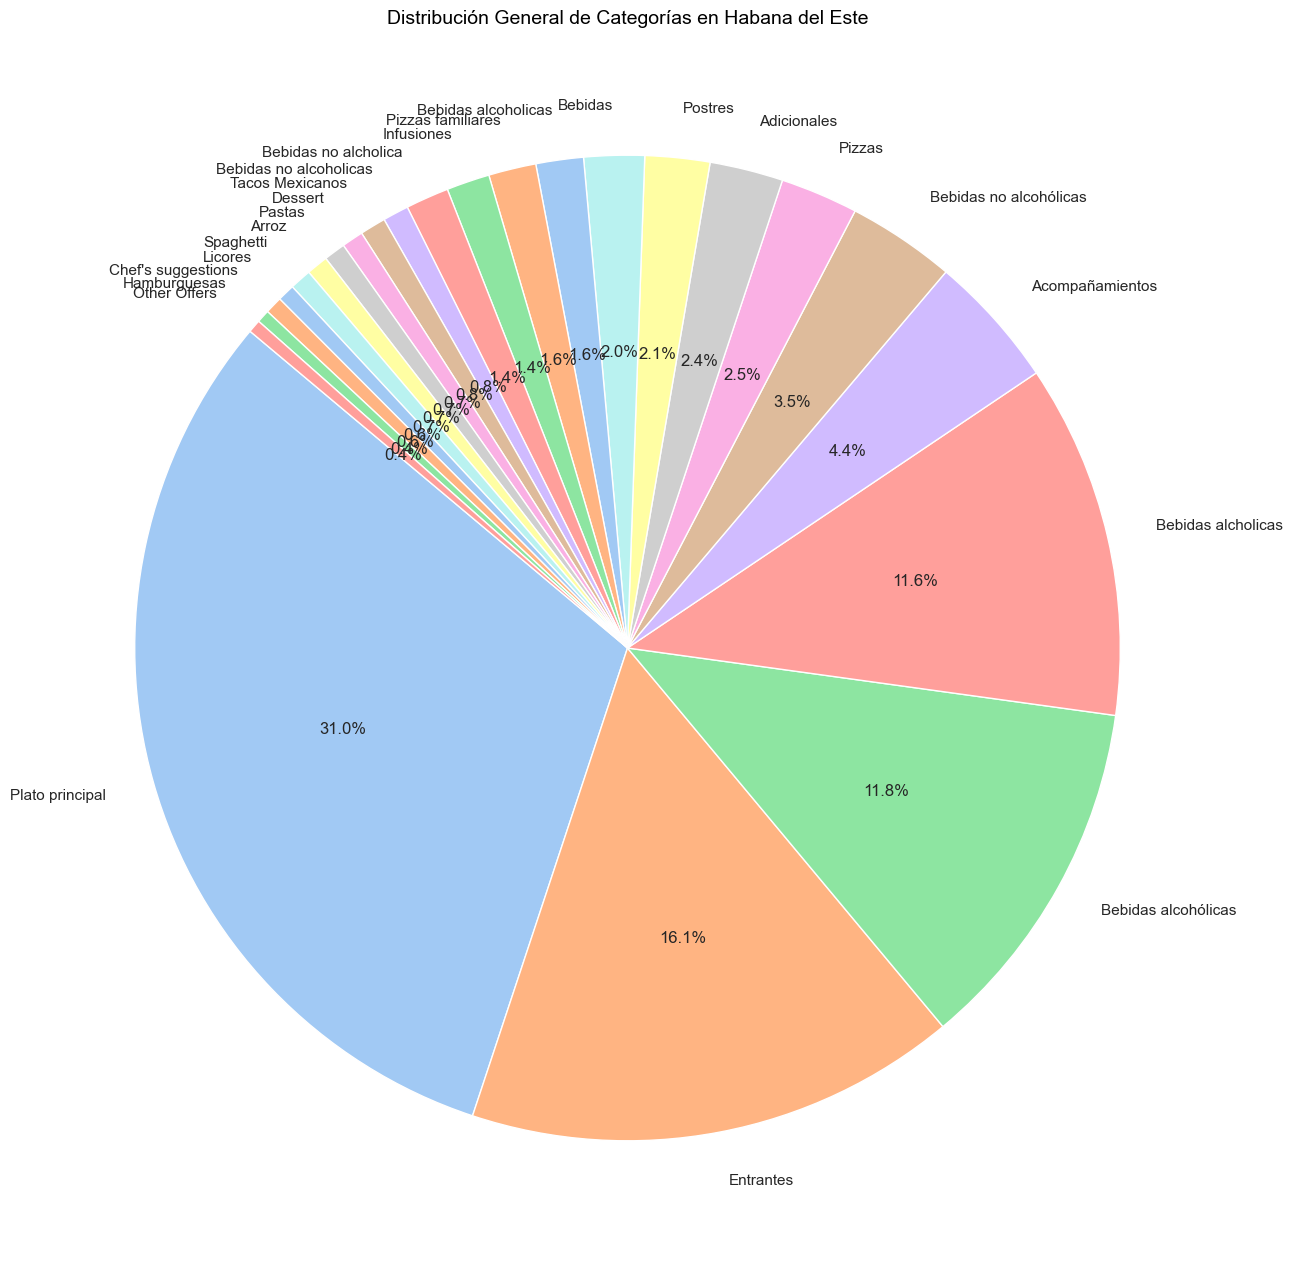

In [464]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es un municipio de La Habana, Cuba, conocido por su extenso territorio y sus hermosas playas. Con localidades icónicas como Guanabo, Cojímar y Alamar, este municipio ofrece una mezcla única de vida costera y urbana.
La Habana del Este es famosa por sus playas, que atraen tanto a los residentes locales como a los turistas. Playas como Guanabo y Cojímar son destinos populares que ofrecen aguas cristalinas y arenas blancas, brindando un escape perfecto del bullicio de la ciudad.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Habana del Este"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en La Habana del Este revela varios patrones interesantes. La combinación de sus playas y su extenso territorio, junto con localidades bien conocidas como Guanabo, Cojímar y Alamar, crea un entorno único que influye en el panorama gastronómico del municipio.
La Vía Blanca, una de las arterias principales, facilita el flujo constante de personas, tanto locales como turistas, que buscan disfrutar de las playas y otros atractivos de La Habana del Este. Este tránsito continuo se refleja en la concentración de establecimientos gastronómicos cerca de estas áreas de alta afluencia, especialmente en las proximidades de las playas.
Las condiciones costeras y el gran territorio del municipio son factores clave que influyen en la oferta gastronómica. Las playas y los entornos turísticos fomentan una demanda de comidas rápidas y accesibles, como mariscos frescos y platos ligeros, que son populares entre los visitantes que buscan disfrutar de una comida mientras pasan tiempo en la playa.
Además, las localidades de Guanabo, Cojímar y Alamar ofrecen una variedad de opciones gastronómicas que no solo atienden a los turistas, sino también a los residentes locales. Esta diversidad se refleja en la presencia de restaurantes familiares, cafeterías y puestos de comida que brindan una rica mezcla de platos tradicionales cubanos y opciones internacionales.
En resumen, la oferta gastronómica de La Habana del Este está profundamente influenciada por sus playas, su extenso territorio y el constante flujo de personas a través de la Vía Blanca. Estos factores crean un entorno dinámico y vibrante, donde los establecimientos gastronómicos se esfuerzan por satisfacer las necesidades y preferencias tanto de los locales como de los turistas. La combinación de comidas rápidas y accesibles con la diversidad de opciones en localidades clave destaca la importancia de la gastronomía en la vida cotidiana y turística de La Habana del Este.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


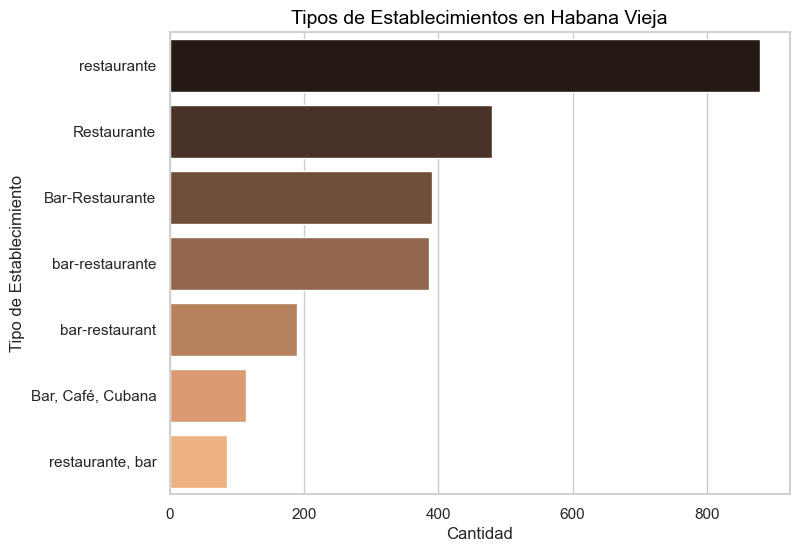

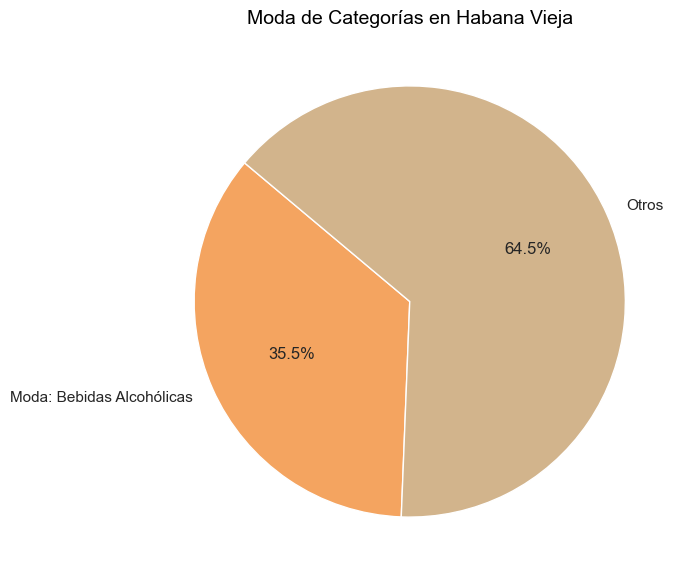

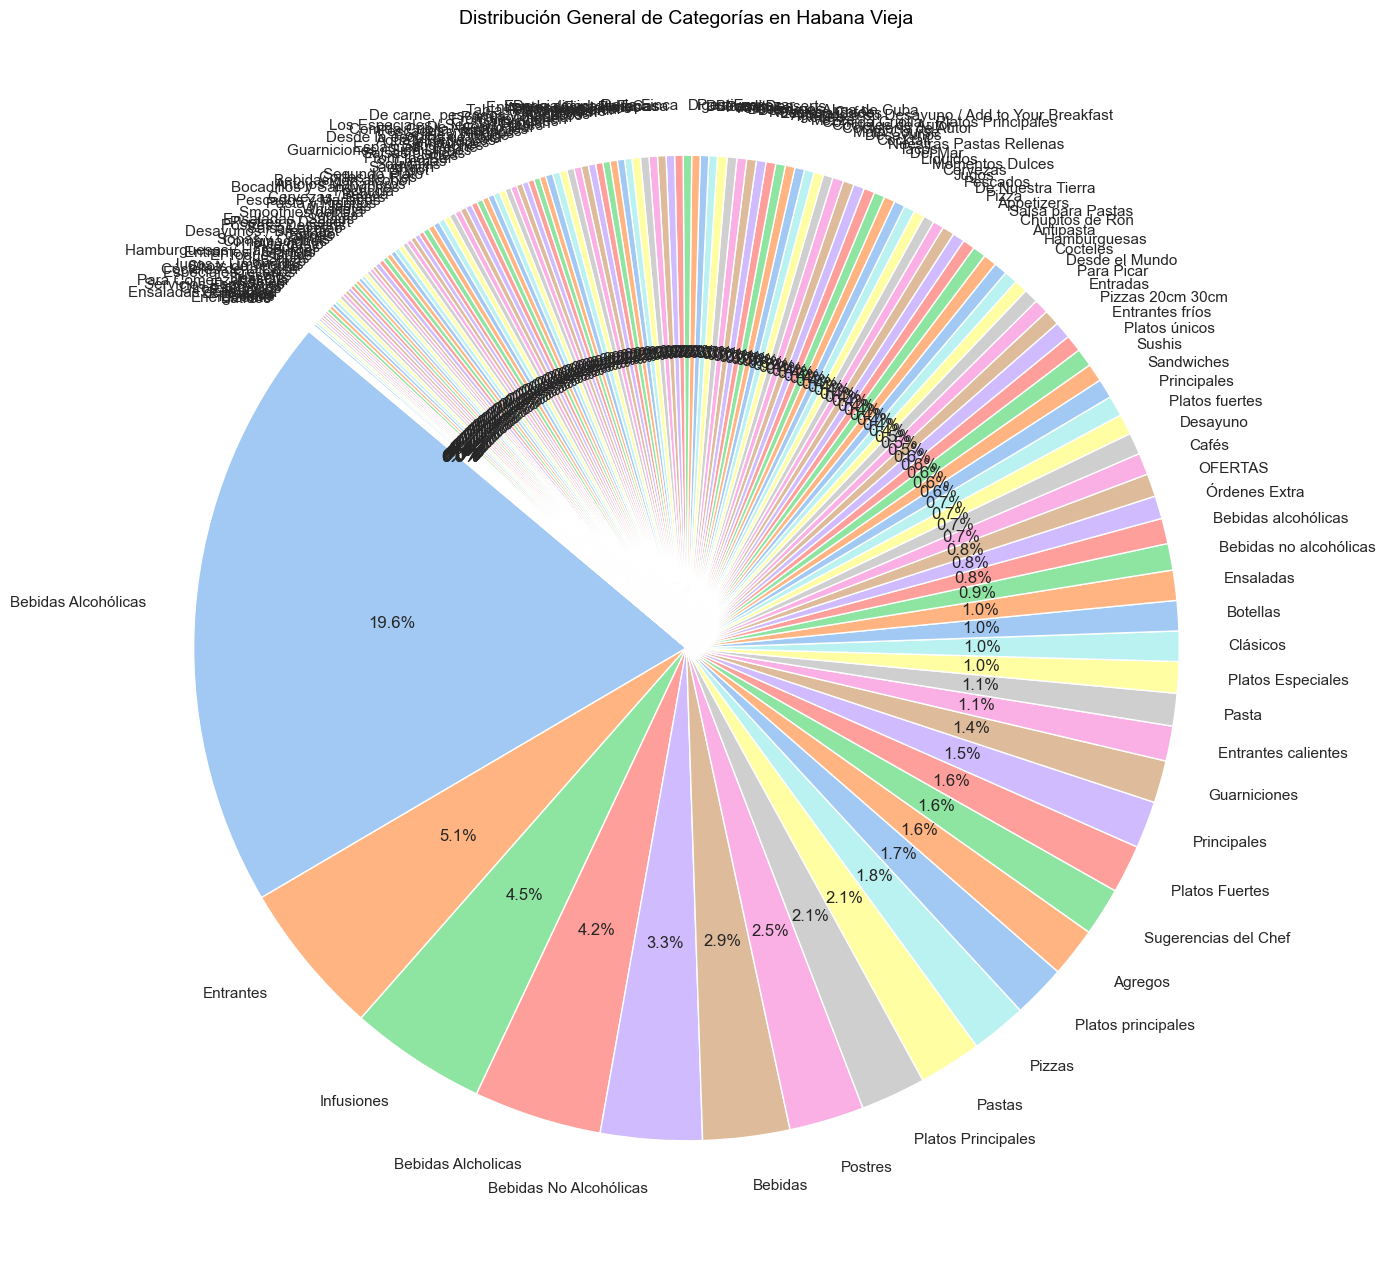

In [465]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> s el municipio más antiguo de La Habana, Cuba, y uno de los lugares más emblemáticos y ricos en historia de la isla. Fundada en 1519, esta parte de la ciudad fue declarada Patrimonio de la Humanidad por la UNESCO en 1982 debido a su impresionante arquitectura colonial y su significativo valor cultural e histórico.
La Habana Vieja es un verdadero crisol de historia y cultura. Sus calles están llenas de monumentos históricos, museos, catedrales y plazas que reflejan siglos de historia cubana. Entre los lugares más destacados se encuentran la Plaza de la Catedral, la Plaza Vieja, el Castillo de la Real Fuerza y la Bodeguita del Medio. Cada rincón de este municipio cuenta una historia, haciendo de La Habana Vieja una parada obligatoria para cualquier visitante.
La importancia de La Habana Vieja en la capital no se limita a su historia, sino que también abarca su papel como centro de actividad económica y turística. El municipio es un imán para turistas de todo el mundo, quienes vienen a explorar su belleza arquitectónica, participar en su vibrante vida nocturna y disfrutar de su rica oferta cultural. Las estrechas calles adoquinadas, los balcones de hierro forjado y los edificios de colores vivos crean un ambiente único que atrapa a quienes lo visitan.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Habana Vieja"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en La Habana Vieja revela varios patrones interesantes, que reflejan su singularidad y prominencia en la ciudad. A pesar de su rica oferta gastronómica, La Habana Vieja es un municipio prácticamente inaccesible para muchos cubanos debido a los precios extremos que dominan los menús.
La variedad de bebidas y comidas en La Habana Vieja es asombrosa, con influencias culinarias de diferentes partes del mundo, sin obviar los platos tradicionales cubanos. Los menús en los restaurantes y cafeterías de este municipio incluyen una amplia gama de opciones, desde cocina gourmet y platos internacionales hasta comidas típicas cubanas. Esta diversidad refleja la convergencia cultural y la influencia global que caracteriza a La Habana Vieja.
Uno de los hallazgos más notables del análisis es la prevalencia de precios elevados en los establecimientos gastronómicos. Este patrón económico subraya la inaccesibilidad de la oferta gastronómica para muchos residentes locales, lo que convierte a La Habana Vieja en un lugar principalmente orientado hacia el turismo. Los precios en los menús van desde lo moderado hasta lo extremadamente caro, lo cual puede ser una barrera significativa para los cubanos que deseen disfrutar de la oferta gastronómica del municipio.
En resumen, la oferta gastronómica de La Habana Vieja es un reflejo de su posición histórica y cultural en la capital. La diversidad de opciones culinarias y la presencia de precios elevados destacan su orientación hacia el turismo, mientras que la influencia global en sus menús subraya la importancia de este municipio como un centro de convergencia cultural. A pesar de los desafíos en términos de accesibilidad para los cubanos, La Habana Vieja sigue siendo un pilar importante en la vida económica y social de la ciudad.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


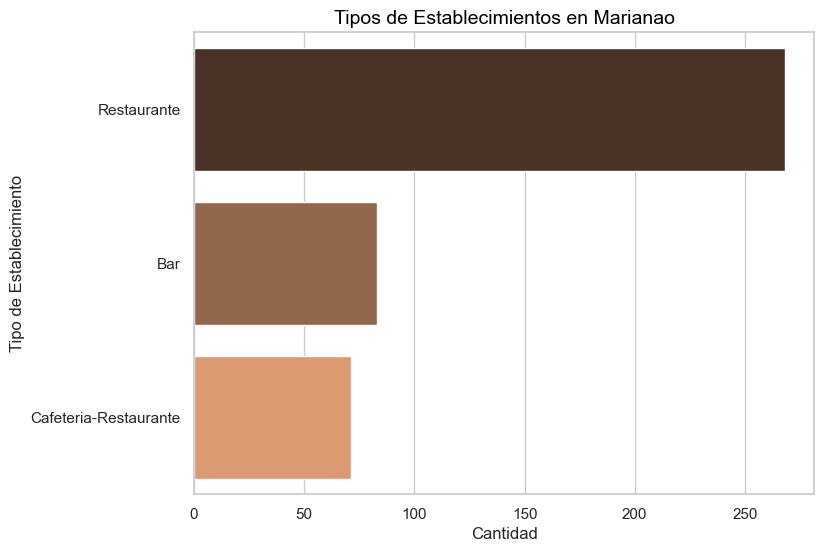

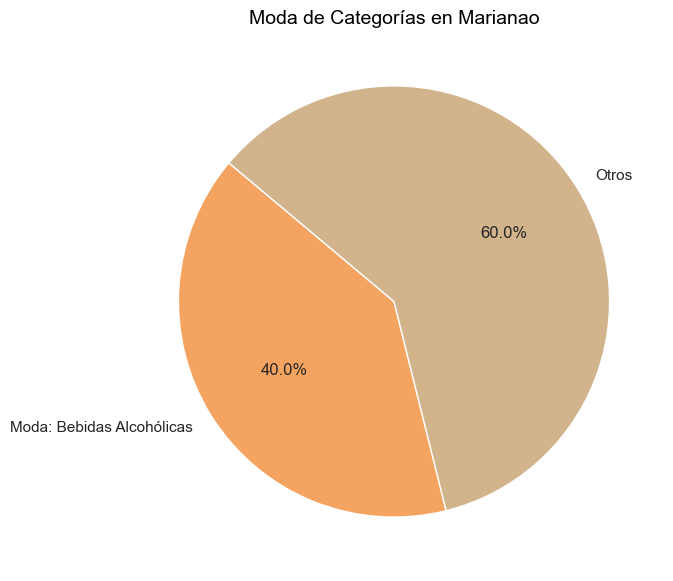

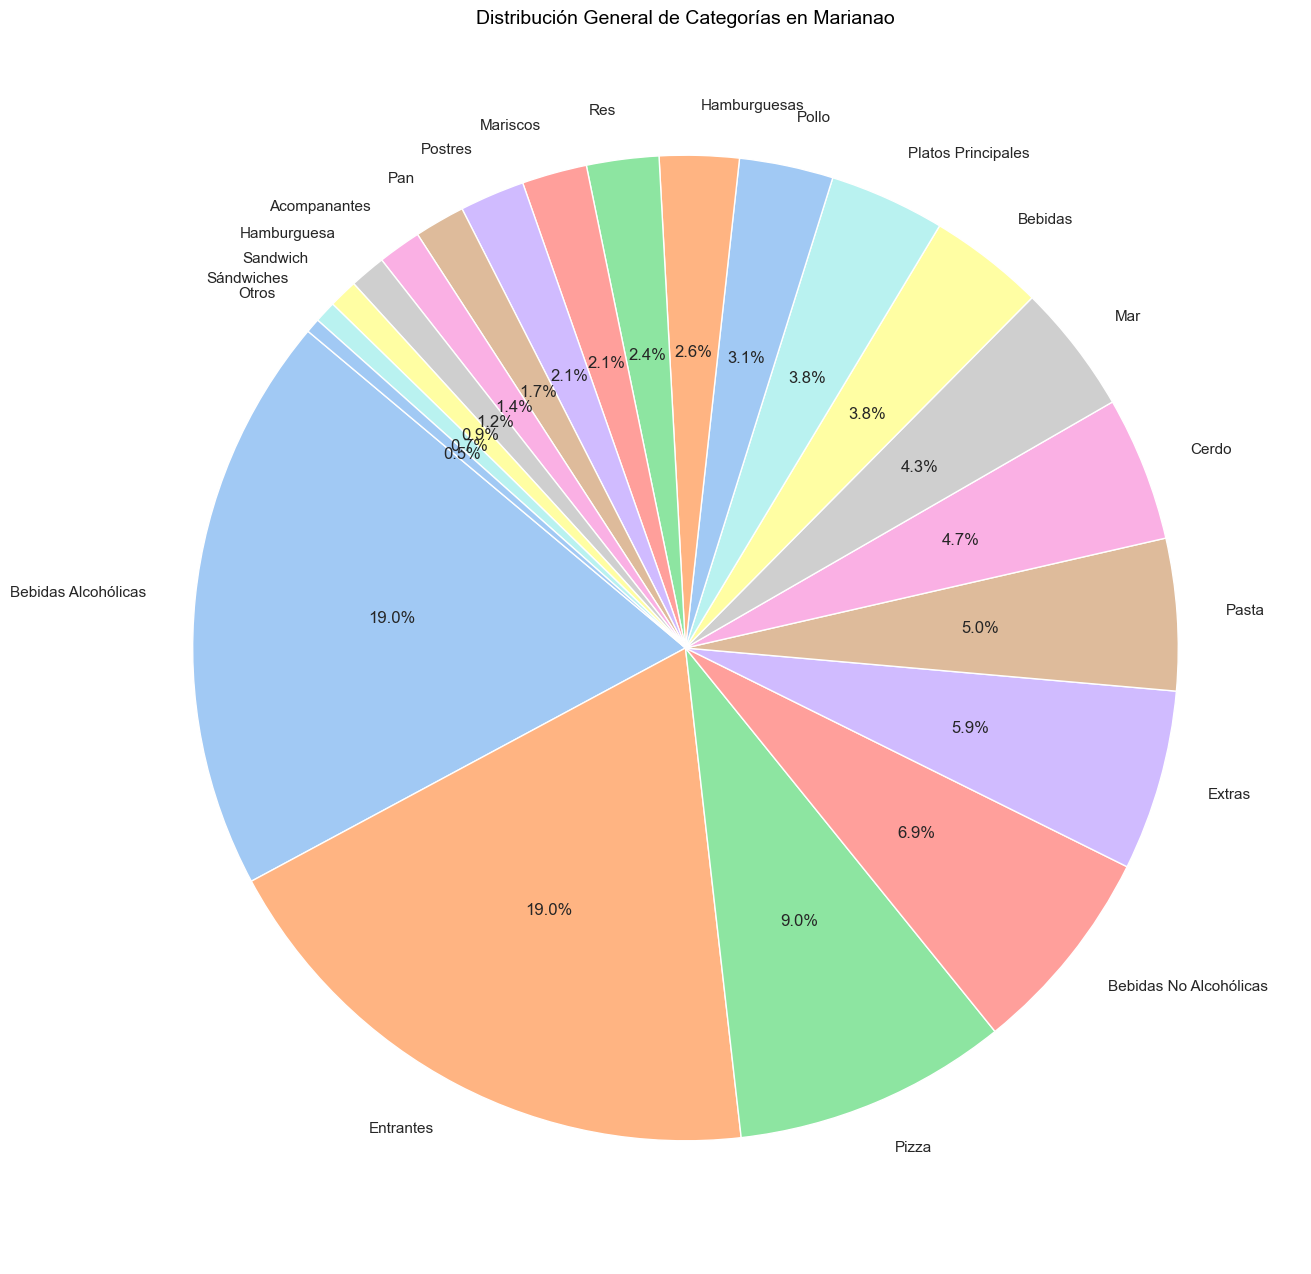

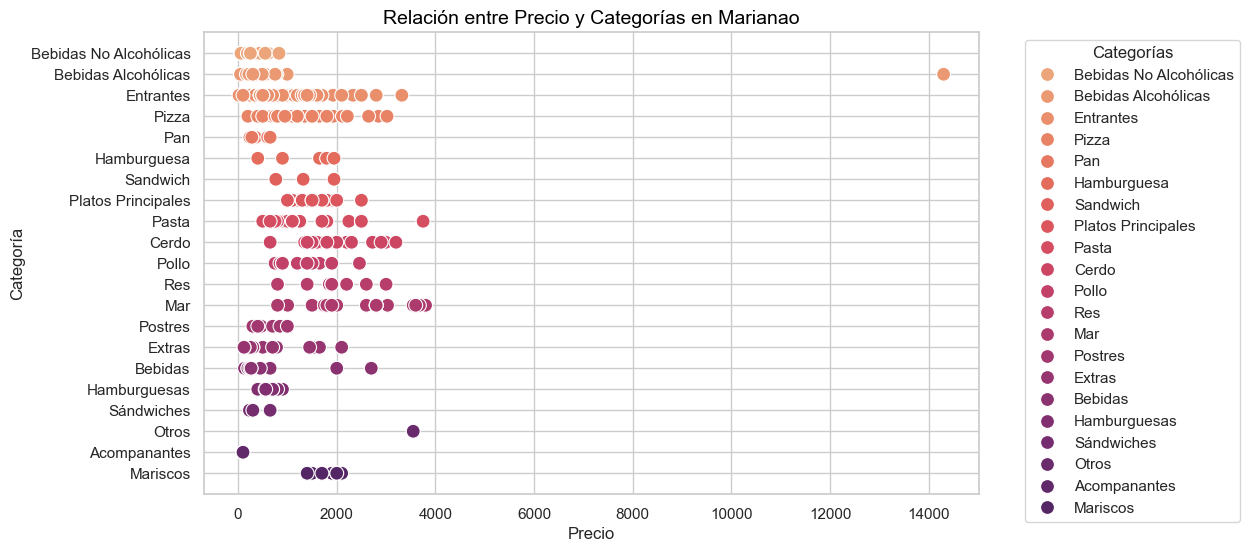

In [466]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es un municipio de La Habana, Cuba, con una rica historia y un papel significativo en la vida cultural de la capital. Este municipio, situado en la parte occidental de la ciudad, es conocido por su vibrante vida nocturna y su importancia histórica en el desarrollo musical y cultural de Cuba.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)

municipio = "Marianao"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en Marianao revela varios patrones interesantes, especialmente el predominio de bares en la zona. Esta tendencia no es sorprendente, dado el papel histórico y cultural de Marianao en la vida nocturna habanera.
Marianao es famoso por albergar el mítico Cabaret Tropicana, uno de los clubes nocturnos más icónicos del mundo, que ha sido un centro de atracción turística desde su apertura en 1939. Este prestigioso cabaret ha influido en el desarrollo de numerosos bares y locales nocturnos en el municipio, creando una atmósfera vibrante y festiva.
Además de Tropicana, Marianao cuenta con muchos otros bares que tienen su propia historia y encanto. Estos bares no solo sirven como lugares de entretenimiento, sino que también son espacios donde se mezclan personas de diferentes edades y orígenes, reflejando la diversidad y la cultura inclusiva del municipio.
La concentración de bares en Marianao es un reflejo de la importancia de la vida social y nocturna en la comunidad. Estos establecimientos ofrecen una amplia gama de bebidas y cócteles, tanto tradicionales cubanos como internacionales, satisfaciendo las preferencias de residentes y visitantes.
En resumen, el predominio de bares en Marianao está íntimamente ligado a su rica historia y su papel en la vida nocturna de La Habana. La presencia de establecimientos icónicos como el Cabaret Tropicana y otros bares históricos destaca la importancia de este municipio como un centro cultural y de entretenimiento. Estos lugares no solo mantienen viva la tradición de la vida nocturna en Marianao, sino que también contribuyen a la economía local y a la cohesión social del municipio.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


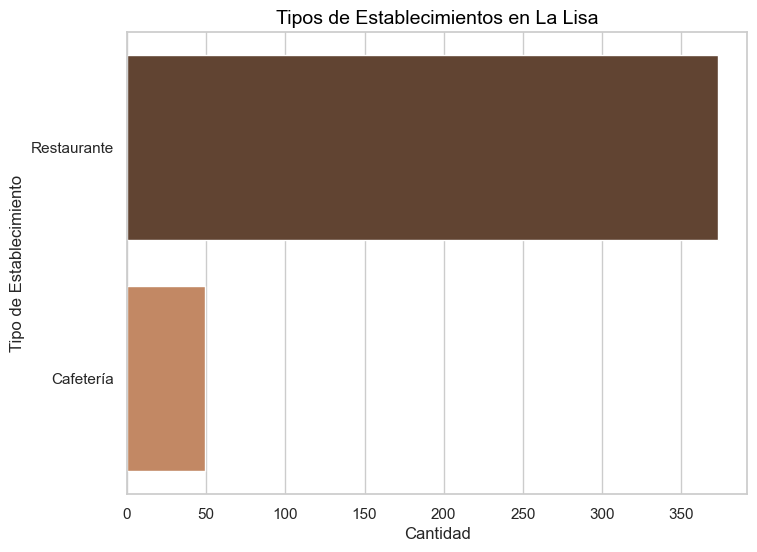

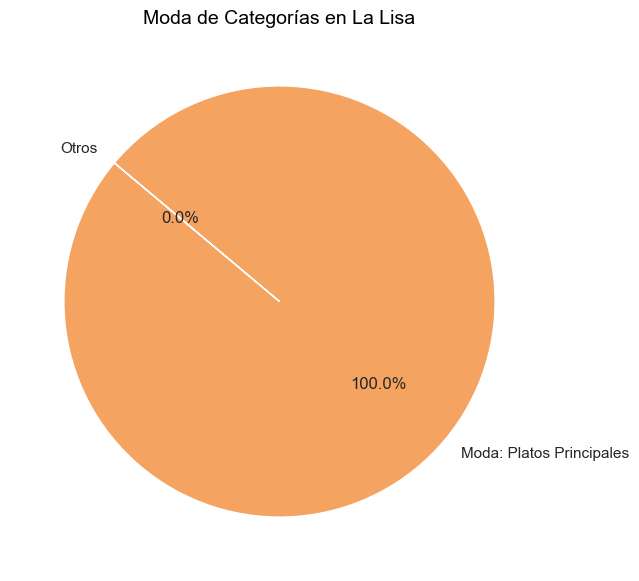

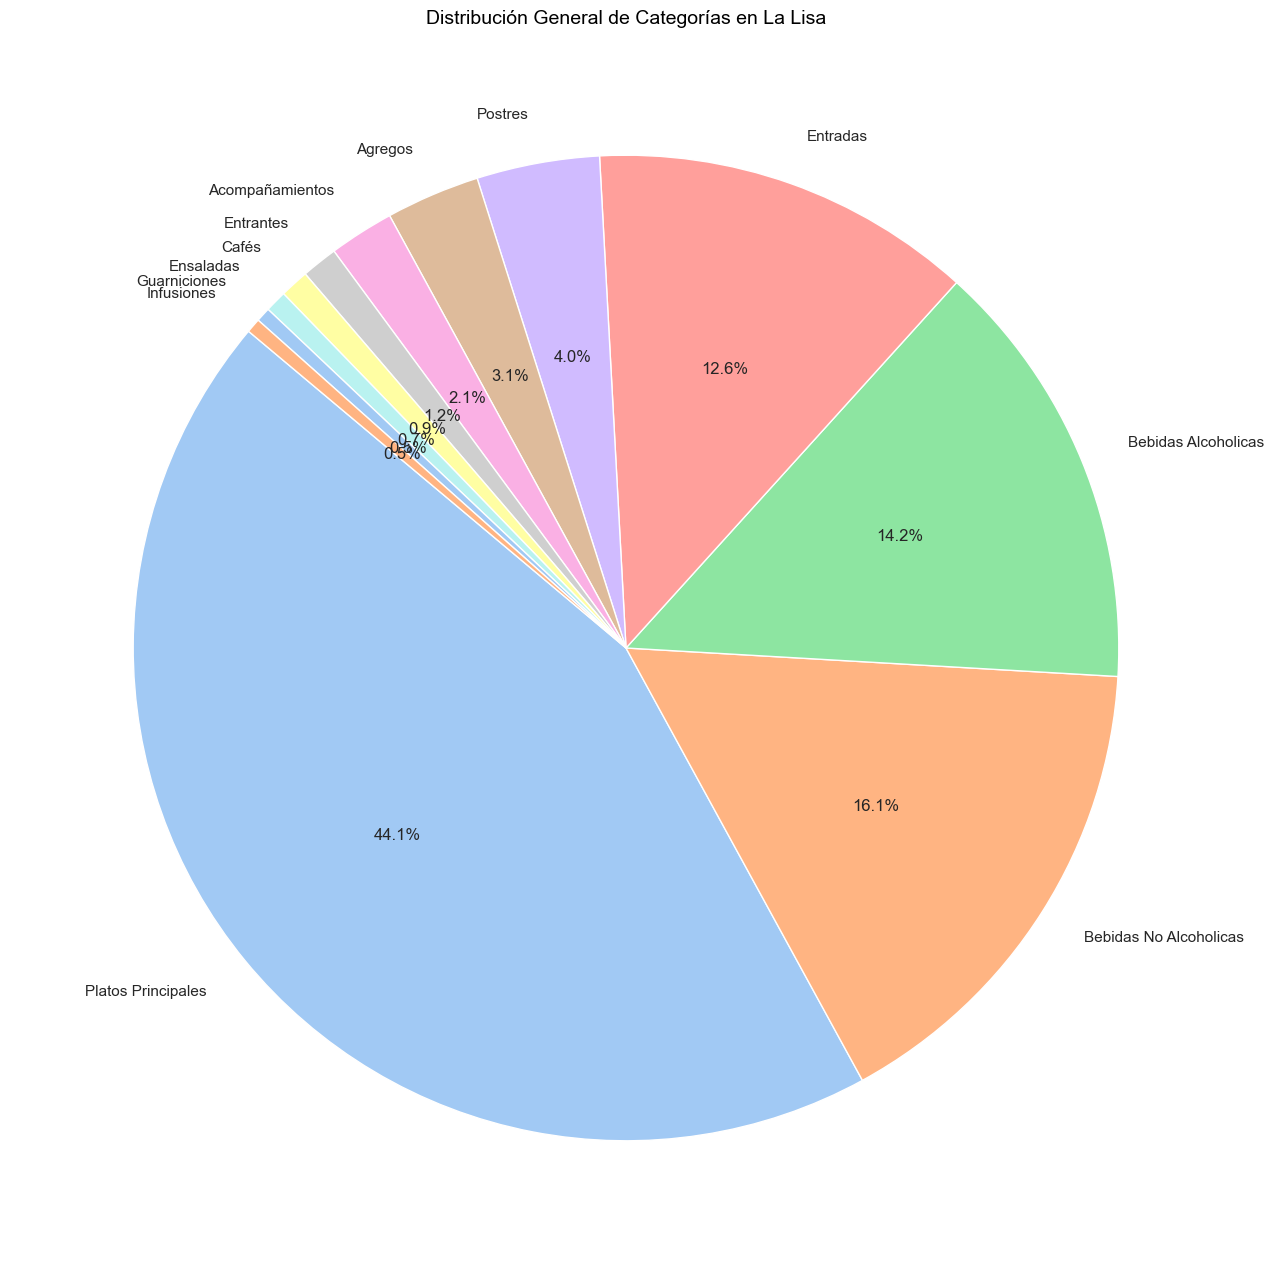

In [467]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

# Estilo CSS para análisis y gráficas
css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

# Función para generar análisis textual con formato HTML
def generar_analisis_textual(df, municipio):
    """
    Genera un análisis textual sobre los datos del municipio proporcionado.
    - df: DataFrame con los datos de análisis.
    - municipio: Nombre del municipio a analizar.
    """
    # Llamar a las funciones del módulo `abcde` para obtener datos
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com= abs.ingredientes_mas_comunes(df, municipio)
    alerg=abs.alergias_mas_frecuentes(df, municipio)
    precio_mun=abs.moda_precio(df, municipio)

    # Crear un bloque de texto para el análisis
    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios periféricos de La Habana, Cuba. Fundado en 1976 como resultado de la división político-administrativa de la provincia, La Lisa combina áreas urbanas y suburbanas, ofreciendo un ambiente tranquilo y residencial1. Sus barrios, como Alturas de La Lisa, Arroyo Arenas y Punta Brava, reflejan la mezcla única de vida urbana y rural que caracteriza a este municipio
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un  <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos
        <hr>
    </div>
    """
    # Mostrar el análisis con estilo CSS
    display(HTML(css_code + texto_analisis))

# Función para generar gráficos sin texto entre ellos
def generar_analisis_con_graficas(df, municipio):
    """
    Genera gráficos explicativos sobre los datos del municipio.
    - df: DataFrame con los datos de análisis.
    - municipio: Nombre del municipio a analizar.
    """
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

# Mostrar análisis textual y gráficas
municipio = "La Lisa"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

# Texto para las conclusiones (puedes completarlo según el análisis)
display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en La Lisa revela un aspecto distintivo: este municipio cuenta con uno de los precios más bajos en comparación con otros municipios de la capital. El precio más frecuente (moda) en los menús de La Lisa es de 300 pesos, lo que subraya la accesibilidad económica de la oferta gastronómica en la zona.
Este factor económico tiene un impacto significativo en la vida cotidiana de los residentes de La Lisa, permitiéndoles acceder regularmente a los establecimientos locales sin una carga financiera excesiva. La asequibilidad de los menús en La Lisa refleja tanto la realidad socioeconómica del municipio como su carácter periférico.
En comparación con otros municipios de La Habana, La Lisa es menos afectada por la presión turística y los costos asociados. Esto se traduce en una oferta gastronómica que está más alineada con las necesidades y posibilidades de los habitantes locales, en lugar de estar orientada hacia el turismo internacional.
En resumen, la oferta gastronómica de La Lisa, con sus precios accesibles y su enfoque en la comunidad local, destaca una diferencia notable en comparación con otros municipios de la capital. A pesar de su carácter periférico, La Lisa proporciona opciones gastronómicas que son tanto asequibles como variadas, reflejando su identidad única dentro del panorama de La Habana.
    </p>
</div>
"""))

c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


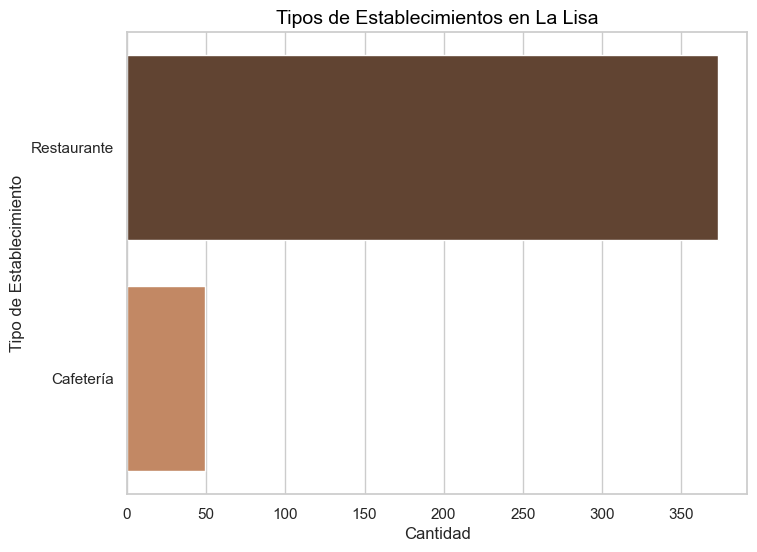

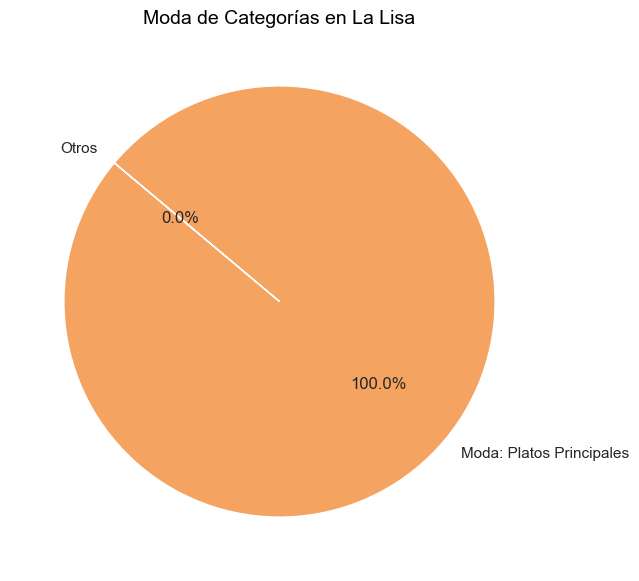

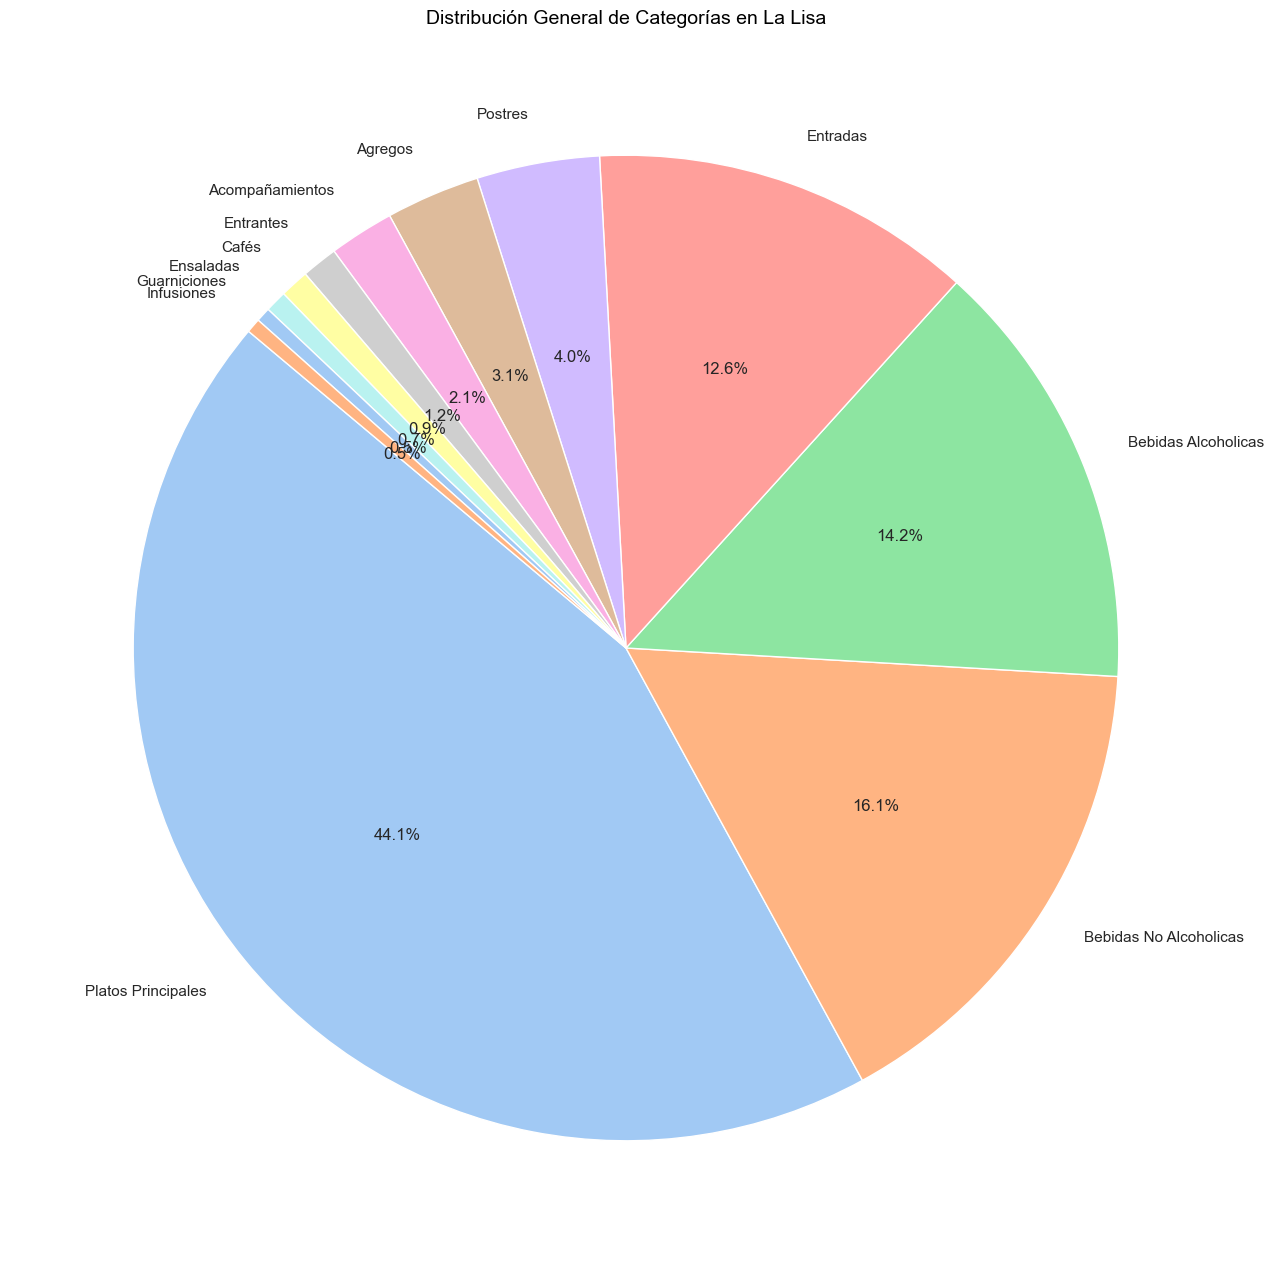

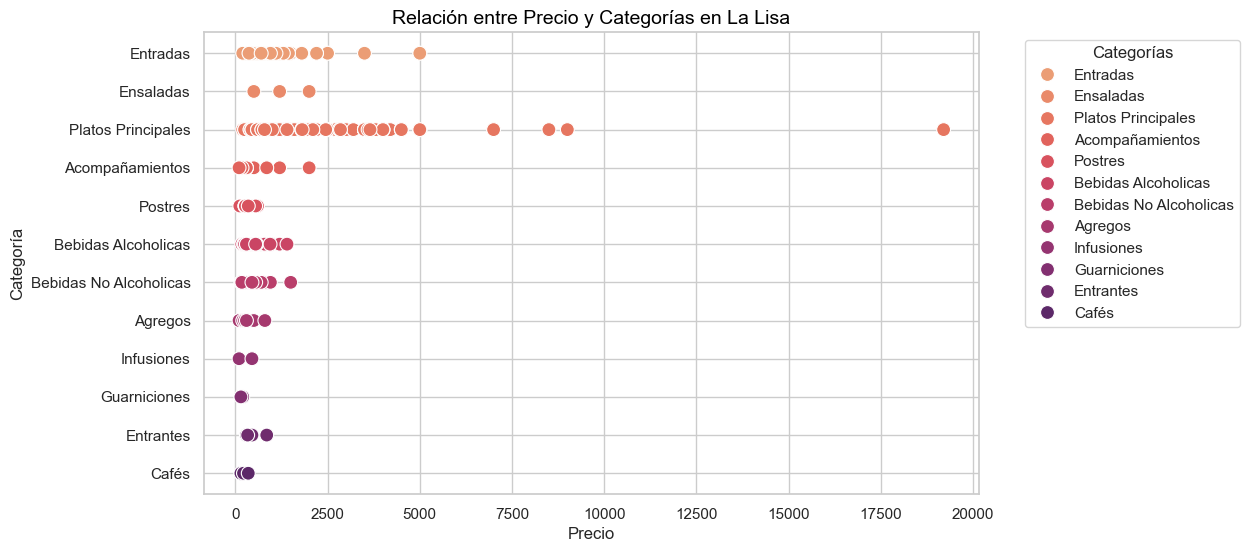

In [468]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios periféricos de La Habana, Cuba. Fundado en 1976 como resultado de la división político-administrativa de la provincia, La Lisa combina áreas urbanas y suburbanas, ofreciendo un ambiente tranquilo y residencial. Sus barrios, como Alturas de La Lisa, Arroyo Arenas y Punta Brava, reflejan la mezcla única de vida urbana y rural que caracteriza a este municipio.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong>% de los establecimientos.
            Además, cabe destacar que el <strong>{serv_10}</strong>% de los establecimientos aplican una Tarifa de servicio del 10%.
            El ingrediente más común es <strong>{ing_com}</strong>, y la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        </p>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)

municipio = "La Lisa"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
        Nuestro análisis de datos sobre los establecimientos gastronómicos en La Lisa revela un aspecto distintivo: este municipio cuenta con uno de los precios más bajos en comparación con otros municipios de la capital. El precio más frecuente (moda) en los menús de La Lisa es de 300 pesos, lo que subraya la accesibilidad económica de la oferta gastronómica en la zona.
        <br><br>
        Este factor económico tiene un impacto significativo en la vida cotidiana de los residentes de La Lisa, permitiéndoles acceder regularmente a los establecimientos locales sin una carga financiera excesiva. La asequibilidad de los menús en La Lisa refleja tanto la realidad socioeconómica del municipio como su carácter periférico.
        <br><br>
        En comparación con otros municipios de La Habana, La Lisa es menos afectada por la presión turística y los costos asociados. Esto se traduce en una oferta gastronómica que está más alineada con las necesidades y posibilidades de los habitantes locales, en lugar de estar orientada hacia el turismo internacional.
        <br><br>
        En resumen, la oferta gastronómica de La Lisa, con sus precios accesibles y su enfoque en la comunidad local, destaca una diferencia notable en comparación con otros municipios de la capital. A pesar de su carácter periférico, La Lisa proporciona opciones gastronómicas que son tanto asequibles como variadas, reflejando su identidad única dentro del panorama de La Habana.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


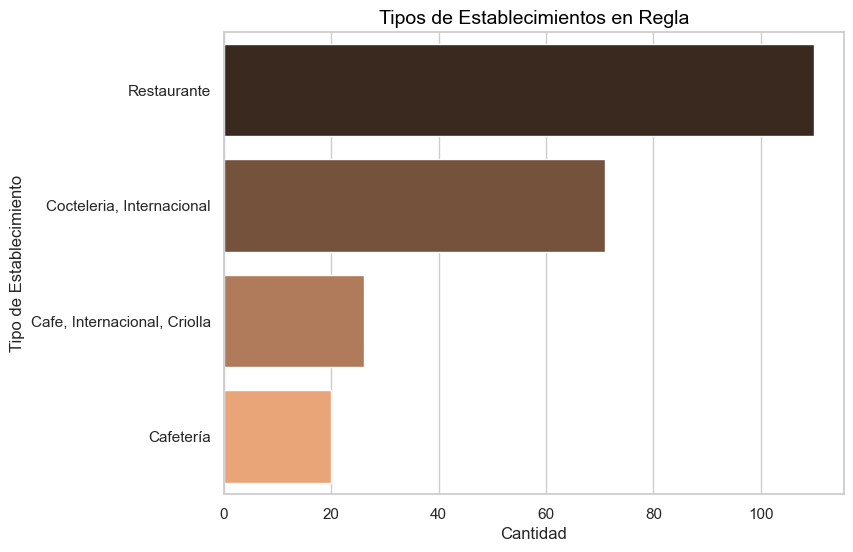

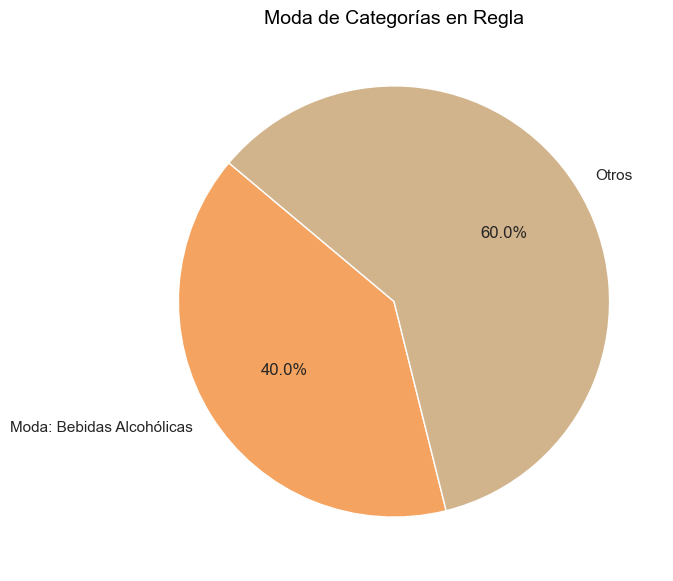

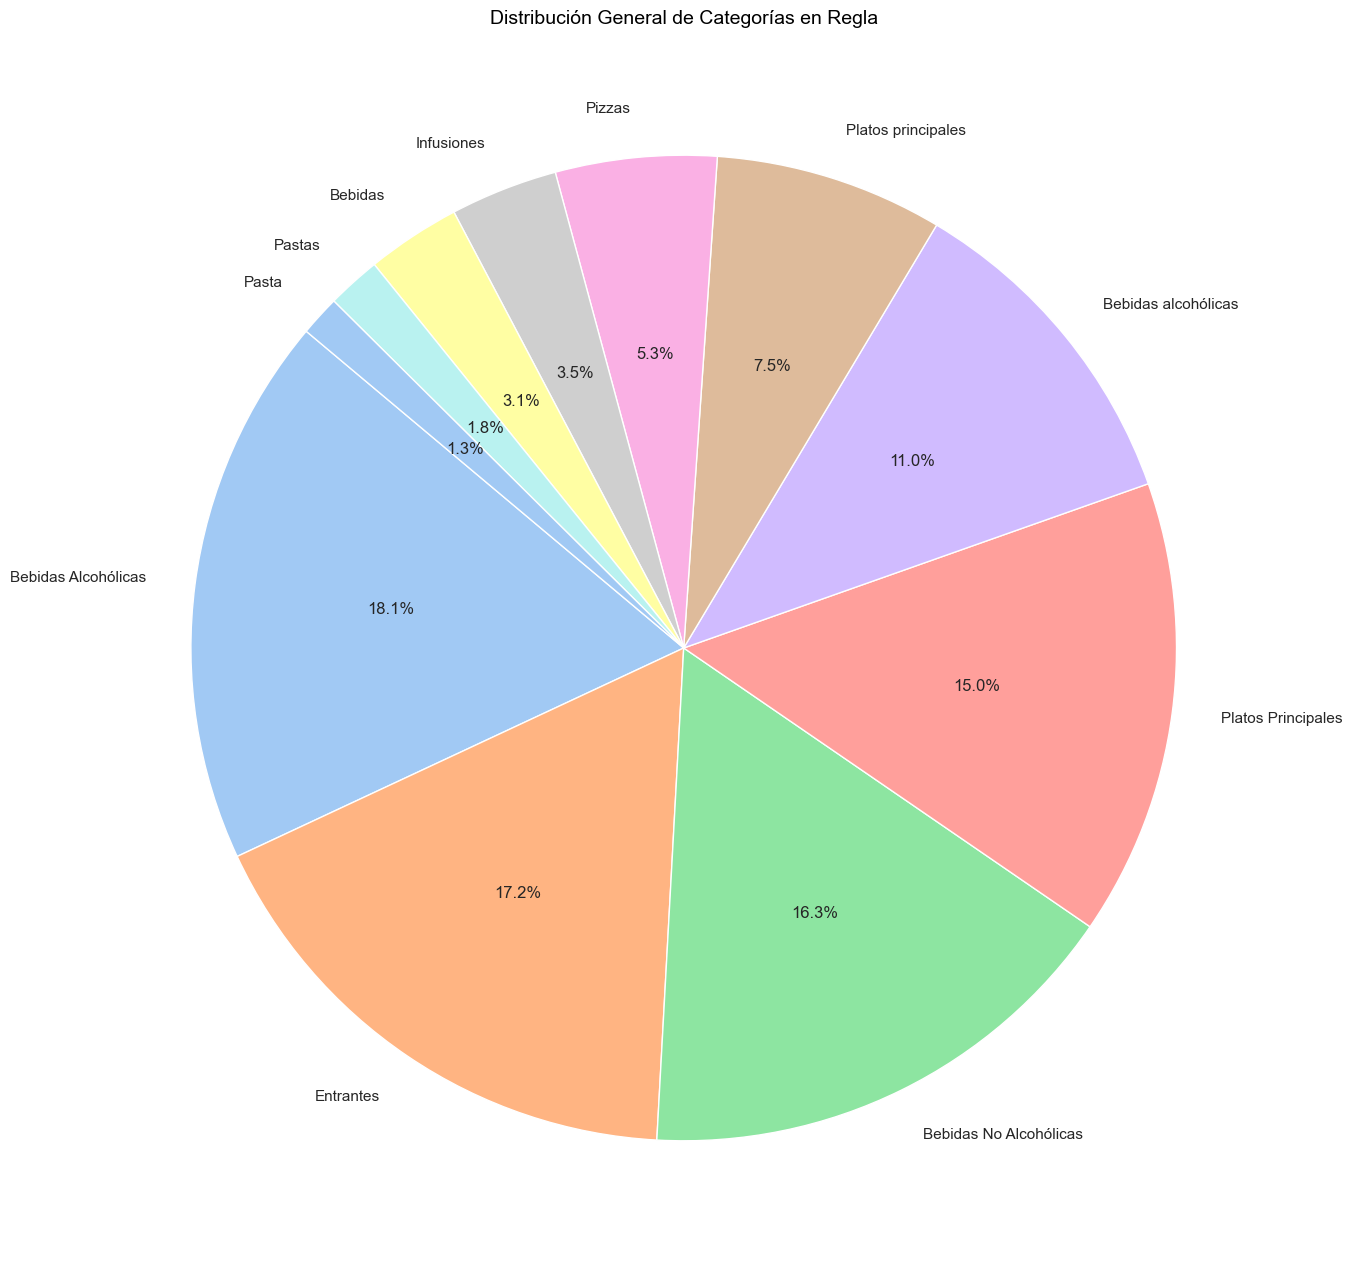

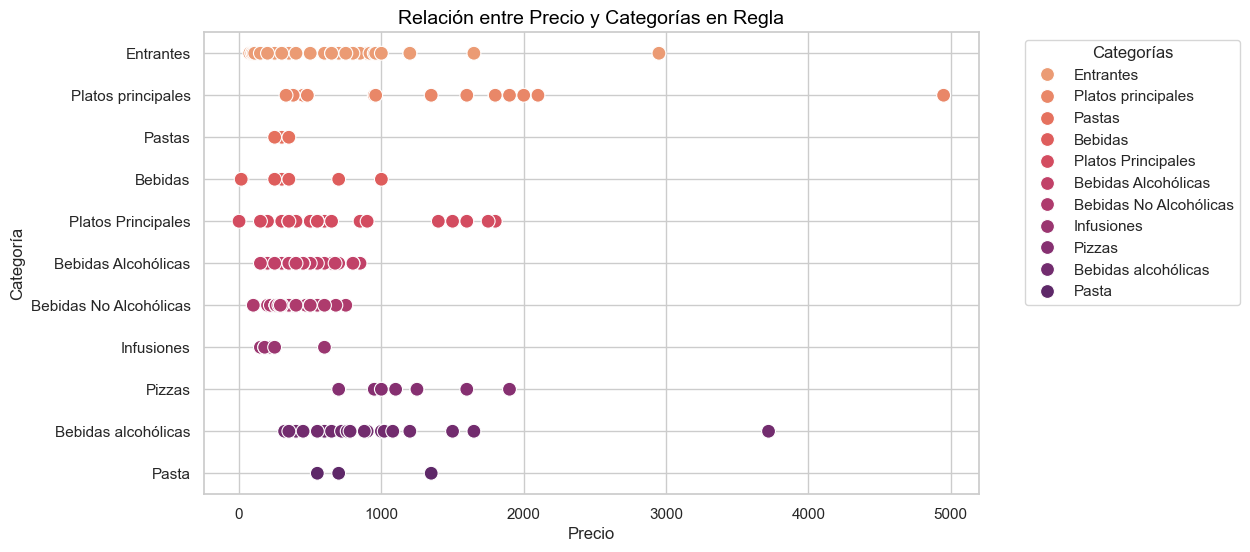

In [469]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es el municipio más pequeño de La Habana, tanto en tamaño como en territorio. Ubicado a orillas de la bahía de La Habana, Regla destaca por su ambiente pintoresco y su importante conexión histórica con la ciudad. Fundado en el siglo XVIII, este municipio es conocido por su fuerte tradición religiosa y sus festividades, siendo la Virgen de Regla una de las figuras más veneradas.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)

municipio = "Regla"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
        Nuestro análisis de datos sobre los establecimientos gastronómicos en Regla reveló un patrón interesante. A pesar de haber encontrado apenas 5 establecimientos gastronómicos, lo cual puede parecer decepcionante, esta situación refleja una realidad importante: Regla es el municipio de menor territorio en la capital cubana.
        <br><br>
        La limitación territorial de Regla implica que hay menos espacio disponible para la proliferación de negocios gastronómicos en comparación con otros municipios más grandes. Esta restricción puede influir en la cantidad de opciones disponibles para los residentes y visitantes. Sin embargo, los establecimientos que sí existen en Regla se centran en ofrecer una experiencia auténtica, con una fuerte presencia de platos tradicionales cubanos.
        <br><br>
        El análisis también muestra que los precios en los menús de Regla son relativamente accesibles, en línea con el carácter local y comunitario del municipio. La oferta gastronómica, aunque limitada en cantidad, se esfuerza por satisfacer las necesidades de la población local con opciones asequibles y tradicionales.
        <br><br>
        En resumen, la situación de Regla en cuanto a la cantidad de establecimientos gastronómicos debe interpretarse en el contexto de su tamaño limitado. La oferta gastronómica, aunque no tan abundante como en otros municipios, refleja las condiciones y las necesidades específicas de su población, manteniendo una fuerte conexión con la tradición y la autenticidad cubanas.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


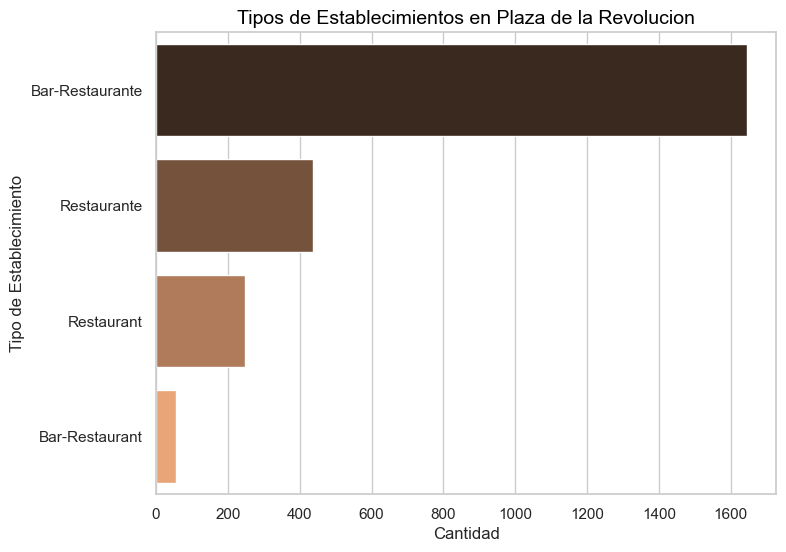

c:\111\graficosmunicipal.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentajes, y=labels, palette=["#D2B48C", "#8B4513"])


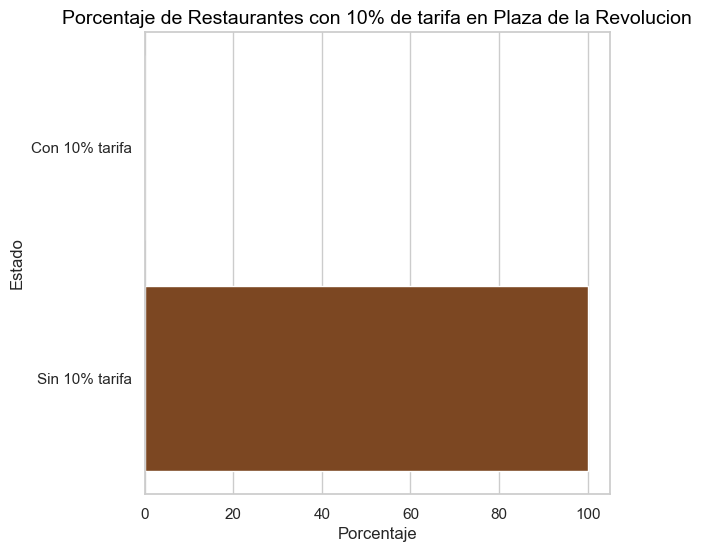

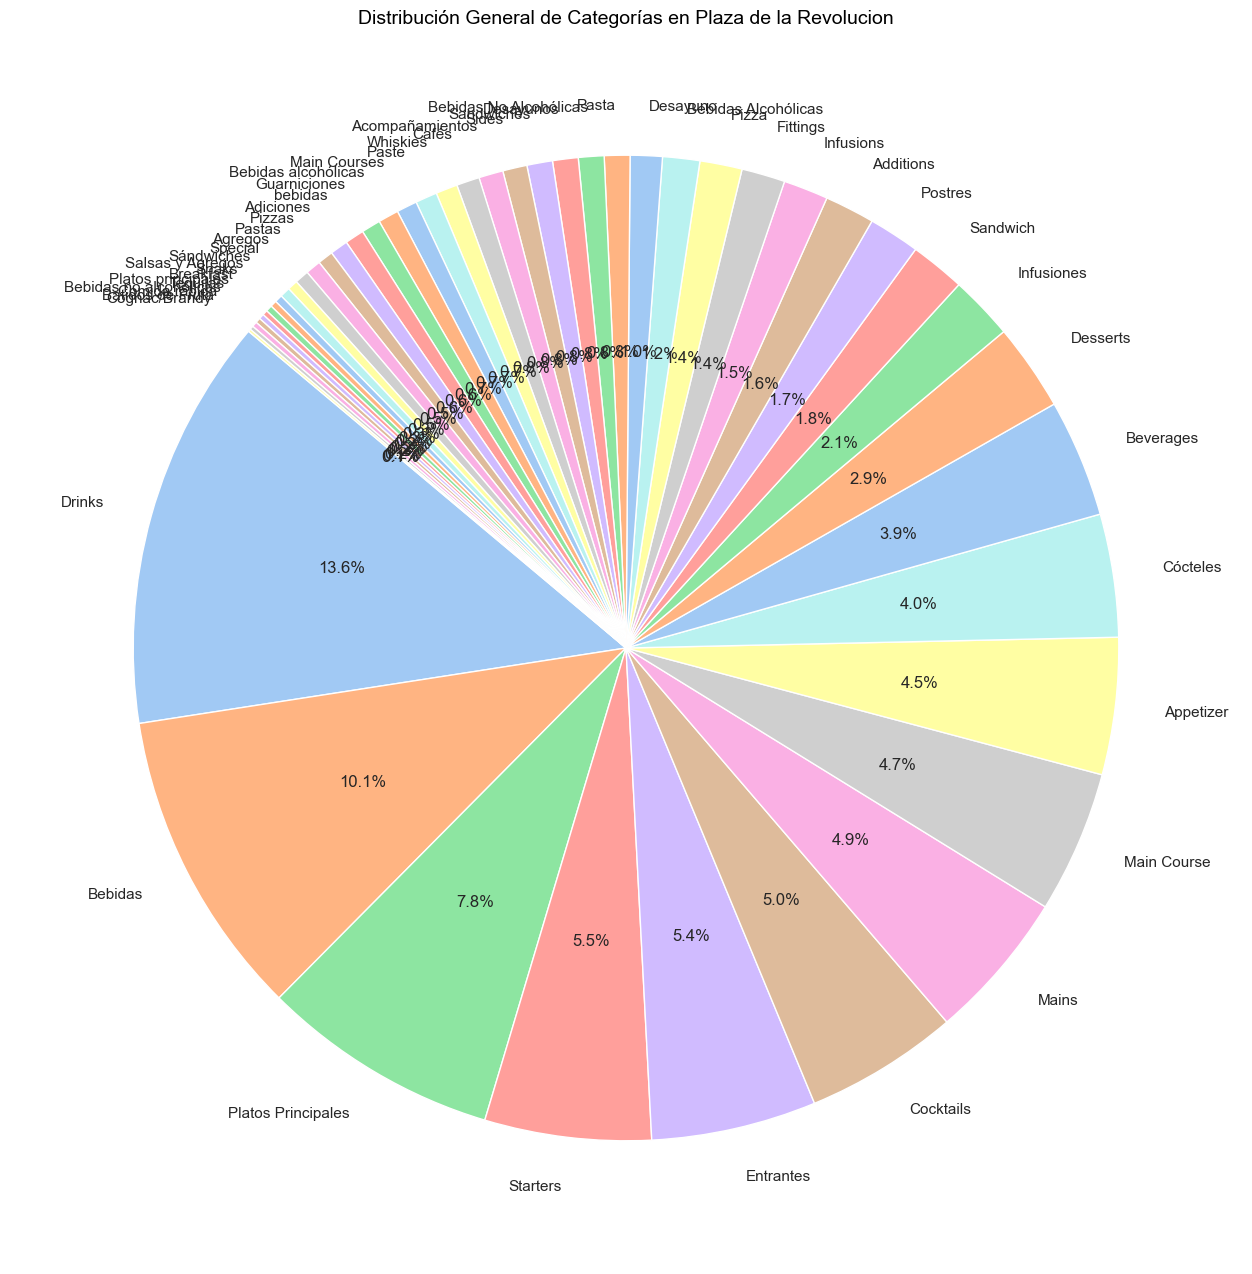

In [470]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es uno de los municipios más emblemáticos y centralizados de La Habana, Cuba. Este municipio es conocido por albergar importantes símbolos históricos y políticos, como la icónica Plaza de la Revolución, donde se realizan eventos y desfiles nacionales. Fundado en 1976, Plaza de la Revolución es el corazón político y administrativo de la capital, con numerosos edificios gubernamentales y monumentos que destacan su relevancia.
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de platos diferentes.
            El servicio de entrega a domicilio (delivery) en el municipio es usado por <strong>{deliv}</strong>% de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_porcentaje_10(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Plaza de la Revolucion"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
        Nuestro análisis de datos sobre los establecimientos gastronómicos en Plaza de la Revolución revela un patrón destacado: es el municipio más diverso de toda la capital. Esta diversidad se refleja en la amplia gama de opciones culinarias disponibles, que abarcan tanto platos cubanos tradicionales como una variedad de cocinas internacionales.
        <br><br>
        La oferta gastronómica en Plaza de la Revolución es un crisol de sabores y culturas, lo que la convierte en un punto de encuentro para personas de diferentes orígenes y gustos. Los menús en los restaurantes y cafeterías del municipio incluyen desde arroces y frijoles, típicos de la cocina cubana, hasta sushi, pasta, y otras especialidades internacionales. Este amplio abanico de opciones satisface las demandas y preferencias de una población diversa y cosmopolita.
        <br><br>
        La diversidad no solo se refleja en los tipos de comida, sino también en la variedad de precios. Esto permite que tanto los locales como los turistas puedan encontrar opciones que se ajusten a sus necesidades y presupuestos. Plaza de la Revolución no solo ofrece alta cocina gourmet, sino también opciones más asequibles, manteniendo un equilibrio que refleja su papel central y accesible en la vida de la capital.
        <br><br>
        El análisis también muestra que Plaza de la Revolución es un municipio en constante movimiento, con una alta rotación de personas debido a su importancia política, administrativa y cultural. Esto crea un entorno dinámico donde la oferta gastronómica debe adaptarse continuamente para satisfacer la demanda de una población activa y diversa.
        <br><br>
        En resumen, Plaza de la Revolución destaca por su diversidad gastronómica, que es un reflejo directo de su importancia central y su mezcla de culturas. La combinación de platos cubanos tradicionales con una gran variedad de cocinas internacionales y opciones de precios variados convierte a este municipio en un punto clave para disfrutar de una experiencia culinaria rica y variada en La Habana.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


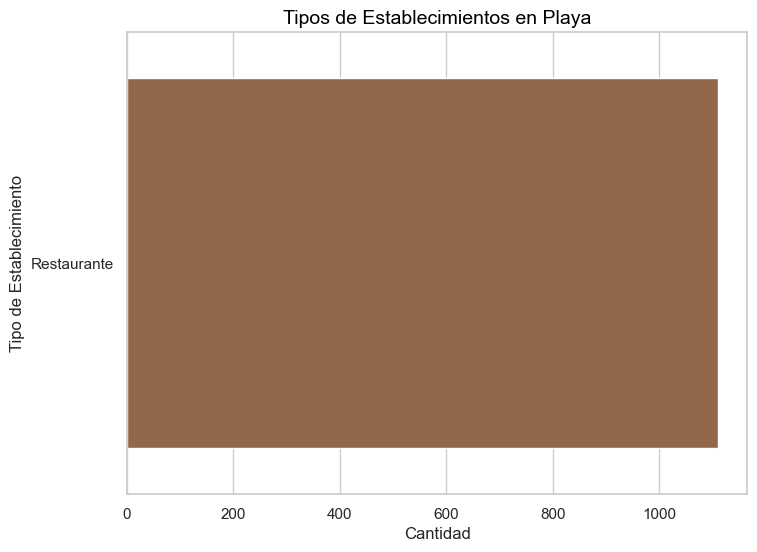

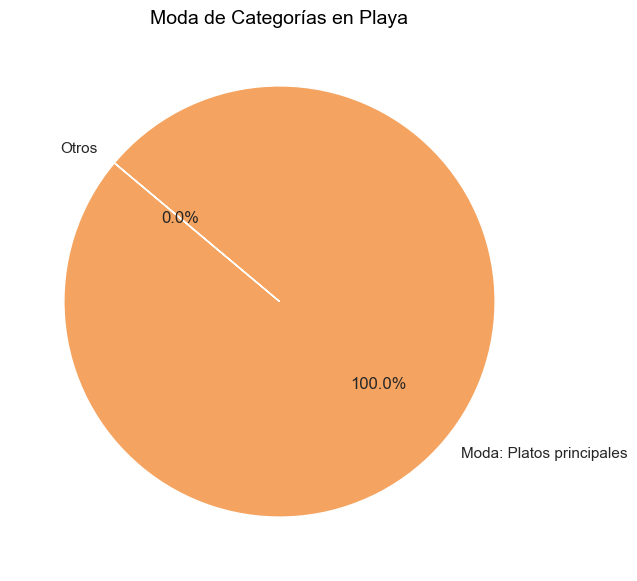

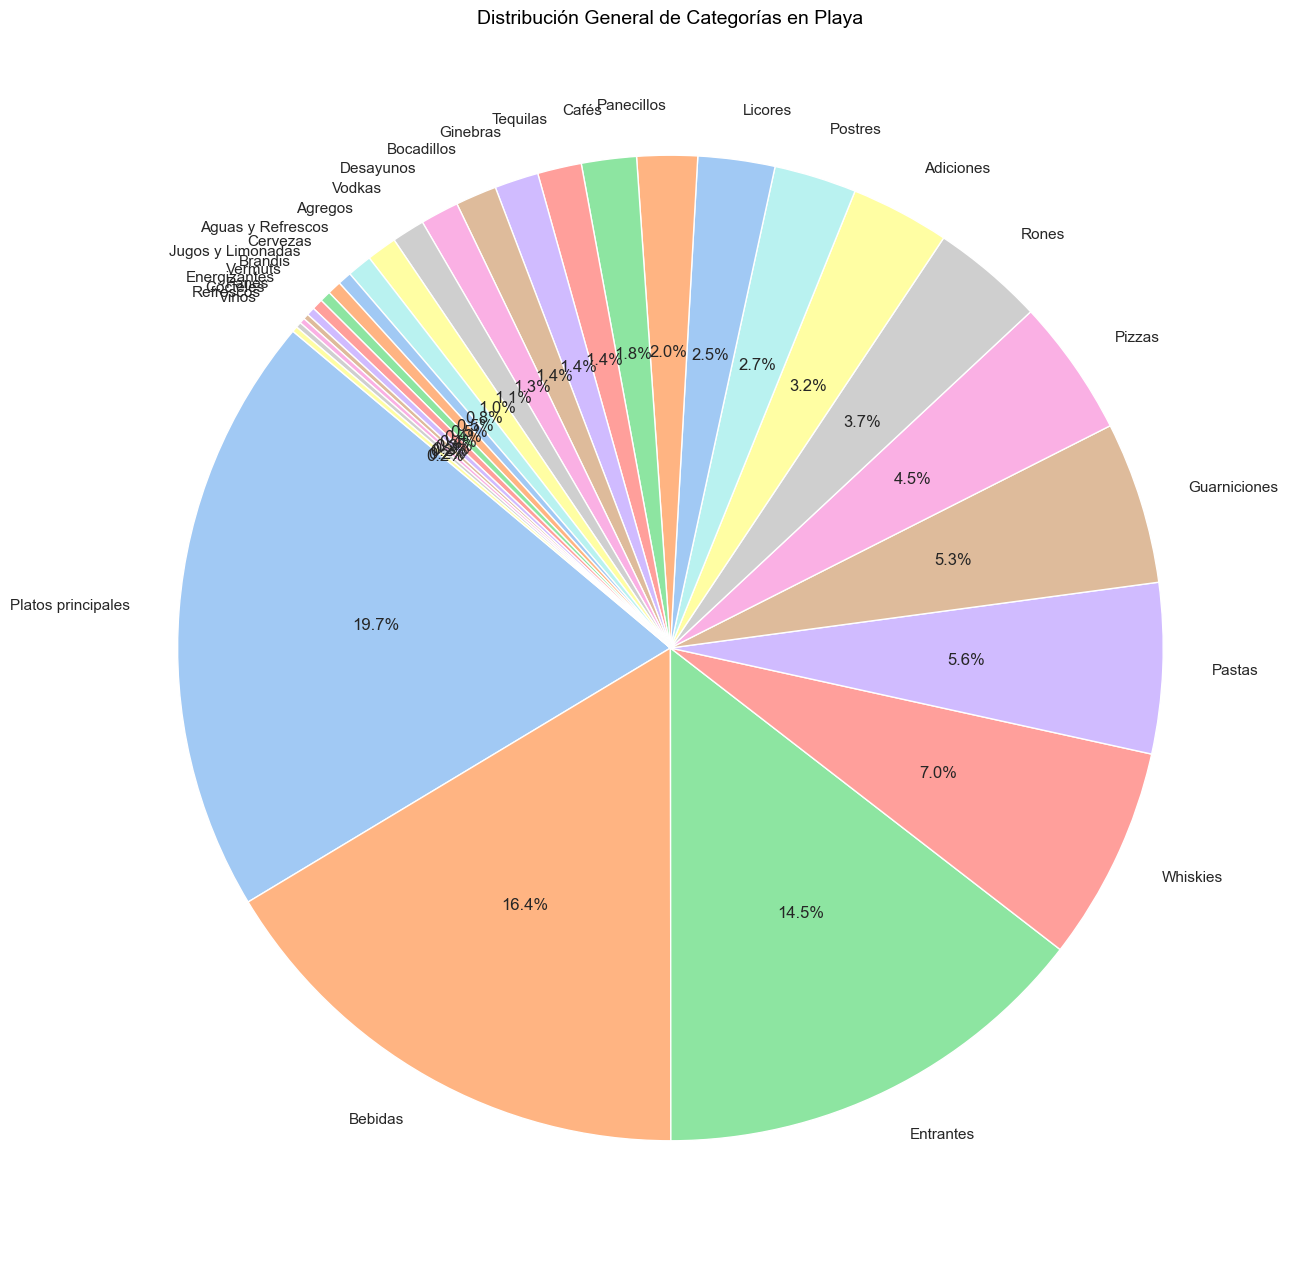

In [471]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    serv_10 = abs.tarifa_10(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> Playa es un municipio costero de La Habana, Cuba, conocido por su atractivo escenario marítimo y su conexión con el mar. Ubicado en la parte occidental de la capital, Playa se destaca por sus impresionantes vistas al océano y su vibrante ambiente costero. Este municipio es hogar de diversos barrios emblemáticos como Miramar, Kholy y Siboney, que son populares tanto entre residentes locales como turistas por su belleza y tranquilidad.
            <br><br>
            Encontramos <strong>{total_est} restaurantes</strong> que ofrecen un total de <strong>{total_plats} platos</strong>.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de platos diferentes.
            <br><br>
            El servicio de entrega a domicilio (delivery) en el municipio es usado por <strong>{deliv}</strong>% de los establecimientos.
            <br><br>
            El ingrediente más común es <strong>{ing_com}</strong>, y la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos.
        </p>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)

municipio = "Playa"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
        Nuestro análisis de datos sobre los establecimientos gastronómicos en Playa revela un patrón interesante: un gran porcentaje de los platos en sus menús provienen del mar. Esta tendencia puede atribuirse a su ubicación costera y la presencia de zonas pesqueras que proporcionan ingredientes frescos y de alta calidad.
        <br><br>
        Los restaurantes en Playa aprovechan al máximo la proximidad al océano no solo para ofrecer mariscos frescos, sino también para crear experiencias gastronómicas que destacan por sus vistas marítimas. Muchos de estos establecimientos están estratégicamente ubicados a lo largo de la costa, ofreciendo a los comensales la oportunidad de disfrutar de una comida deliciosa mientras contemplan el mar.
        <br><br>
        En los menús de los restaurantes en Playa, es común encontrar una amplia variedad de pescados, mariscos, y platos elaborados con ingredientes frescos del mar. Estos incluyen desde ceviches y cocteles de camarón hasta pescados a la parrilla y mariscadas. La frescura y calidad de estos ingredientes son un sello distintivo de la oferta gastronómica de Playa, que se enorgullece de su conexión directa con el mar.
        <br><br>
        Además, la cultura pesquera de Playa se refleja en la tradición culinaria local. Los pescadores de la zona contribuyen significativamente al suministro de ingredientes, y sus capturas diarias forman la base de muchos platos que se sirven en los restaurantes del municipio. Esta relación estrecha entre la comunidad pesquera y los establecimientos gastronómicos fortalece la identidad culinaria de Playa y promueve la sustentabilidad en el uso de recursos marinos.
        <br><br>
        En resumen, la oferta gastronómica de Playa está profundamente influenciada por su entorno marítimo. La prevalencia de platos de mariscos en sus menús es un reflejo de su rica tradición pesquera y su ubicación privilegiada. Los restaurantes en Playa no solo brindan deliciosos mariscos frescos, sino que también ofrecen experiencias gastronómicas únicas que integran las hermosas vistas al mar, creando un ambiente relajante y memorable para los comensales.
    </p>
</div>
"""))


c:\111\graficosmunicipal.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_restaurantes.values, y=tipo_restaurantes.index, palette="copper")


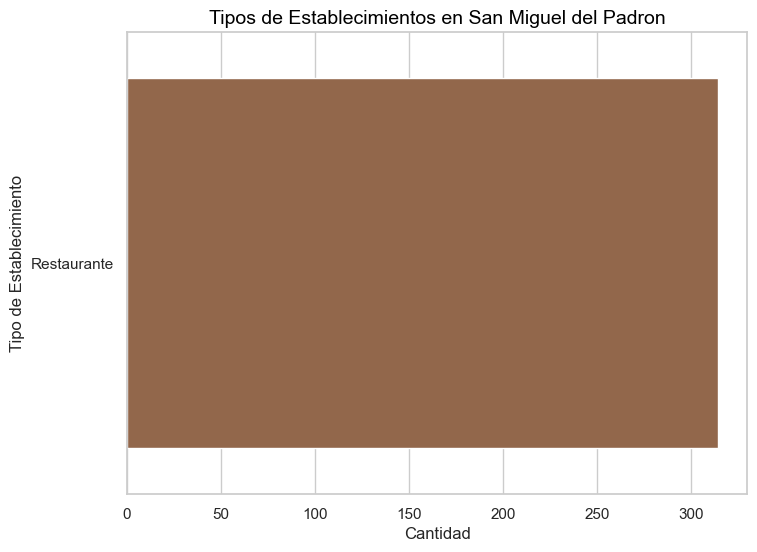

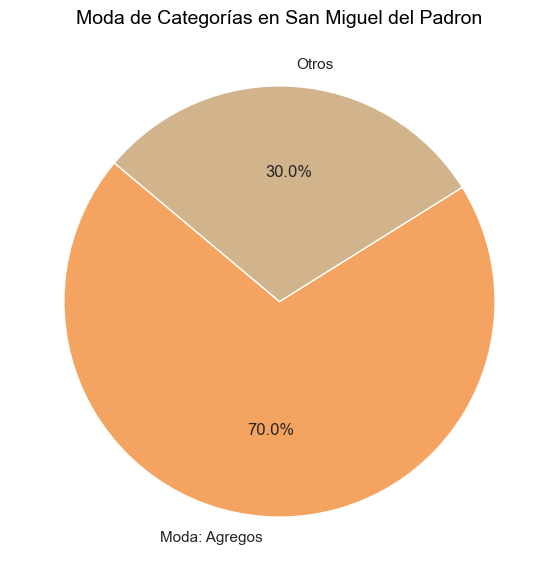

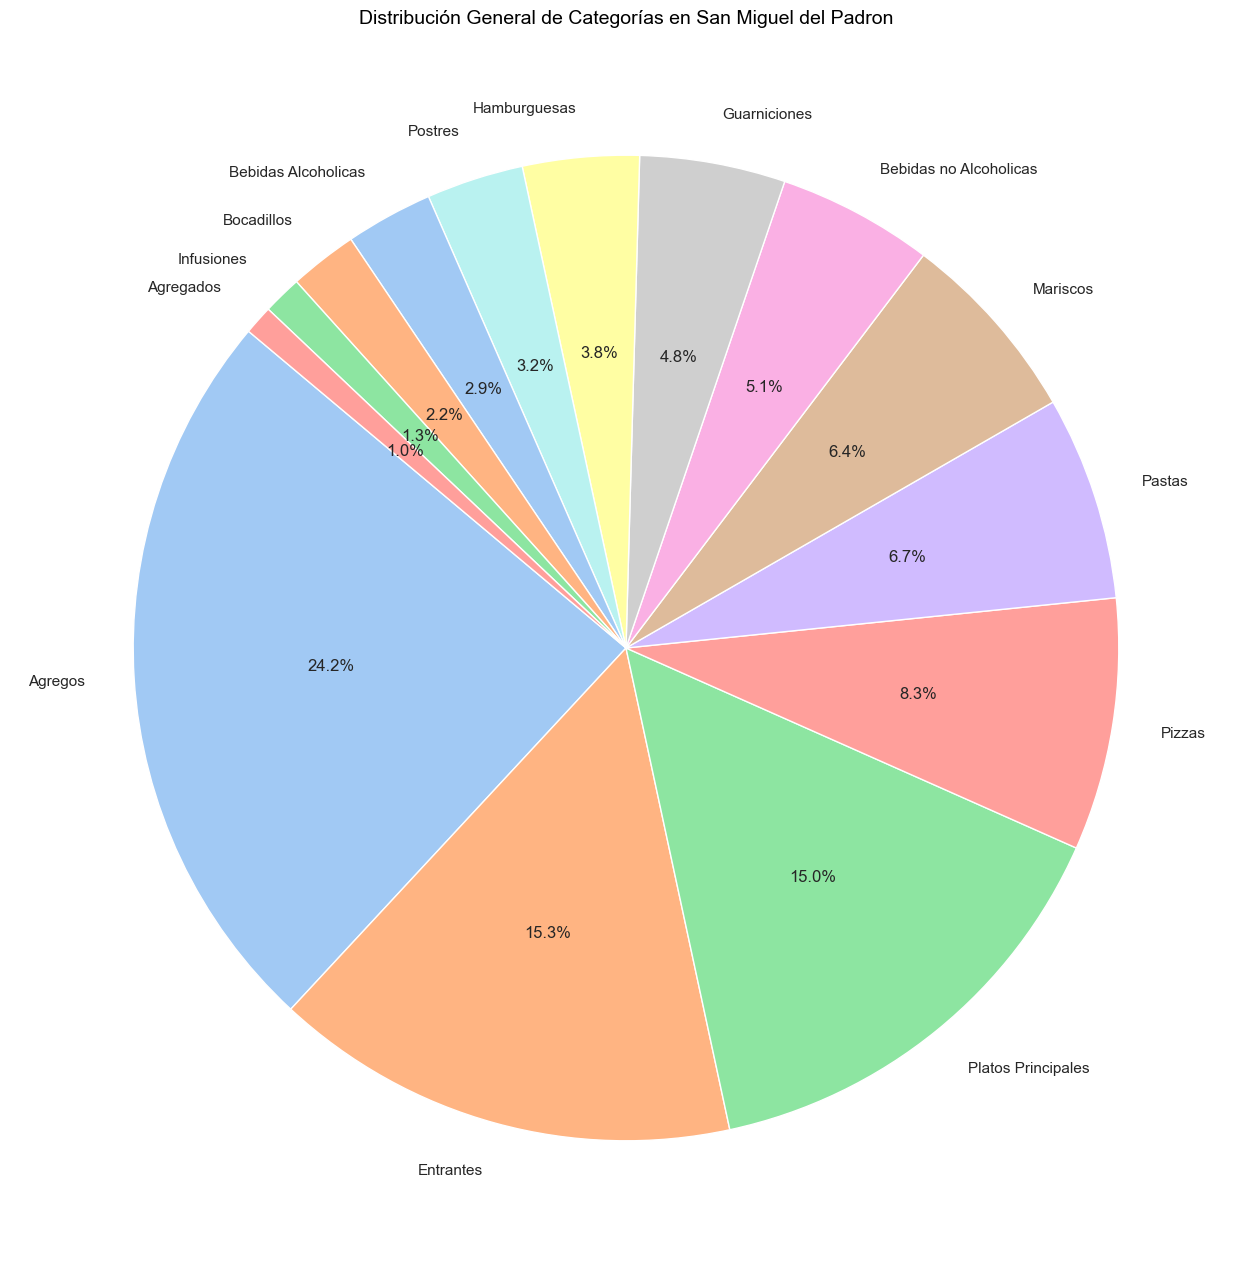

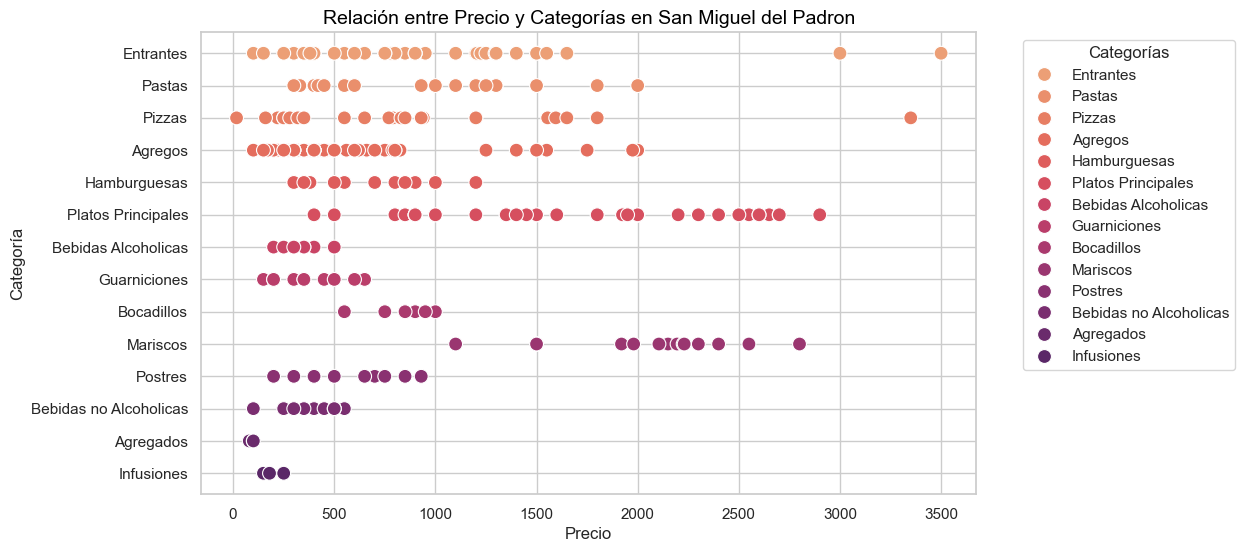

In [472]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import graficosmunicipal as gr
import analisismunicipal as abs

css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
</style>
"""

def generar_analisis_textual(df, municipio):
    total_est = abs.total_establecimientos(df, municipio)
    total_plats = abs.total_platos(df, municipio)
    total_cat = abs.total_categorias(df, municipio)
    deliv = abs.porcentaje_delivery(df, municipio)
    plato_comun = abs.plato_mas_comun(df, municipio)
    categoria_comun = abs.categoria_mas_comun(df, municipio)
    ing_com = abs.ingredientes_mas_comunes(df, municipio)
    alerg = abs.alergias_mas_frecuentes(df, municipio)
    precio_mun = abs.moda_precio(df, municipio)

    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos en el Municipio: {municipio}</h2>
        <p class="descripcion">
            <strong>{municipio}</strong> es un municipio ubicado en la parte oriental de La Habana, Cuba. Este municipio, aunque no tan conocido como otros, tiene su propio encanto y características distintivas. San Miguel del Padrón combina áreas residenciales con zonas industriales, ofreciendo un ambiente tranquilo y una comunidad unida.
Históricamente, San Miguel del Padrón ha sido un lugar de crecimiento y desarrollo, con una población diversa y trabajadora. El municipio alberga varios sitios de interés, incluyendo parques y espacios verdes que brindan un respiro del bullicio de la ciudad. Sus barrios, como San Francisco de Paula y Santa Amalia, son conocidos por su fuerte sentido de comunidad y tradición.
            <br><br>
            El plato más común es <strong>{plato_comun}</strong>, mientras que la categoría más ofrecida es <strong>{categoria_comun}</strong>. En total, los restaurantes en el municipio ofrecen <strong>{total_cat}</strong> categorías de diferentes de platos.
            El servicio de entrega a domicilio (delivery) en el municipio es de un <strong>{deliv}</strong> por ciento de los establecimientos.
            El ingrediente más común es <strong>{ing_com}</strong>, y los platos ofrecidos la alergia más frecuente observada es <strong>{alerg}</strong>. En términos económicos, el precio más frecuente de los platos es de <strong>{precio_mun:.2f}</strong> pesos
        <hr>
    </div>
    """
    display(HTML(css_code + texto_analisis))

def generar_analisis_con_graficas(df, municipio):
    gr.graficar_tipo_restaurantes(df, municipio)
    gr.graficar_moda_general(df, municipio)
    gr.graficar_proporciones_generales(df, municipio)
    gr.graficar_precio_vs_categoria(df, municipio)
municipio = "San Miguel del Padron"
generar_analisis_textual(datos_df, municipio)
generar_analisis_con_graficas(datos_df, municipio)

display(HTML(css_code + """
<div class="contenido">
    <h2 class="subtitulo">Conclusiones</h2>
    <p class="descripcion">
Nuestro análisis de datos sobre los establecimientos gastronómicos en Playa revela un patrón interesante: un gran porcentaje de los platos en sus menús provienen del mar. Esta tendencia puede atribuirse a su ubicación costera y la presencia de zonas pesqueras que proporcionan ingredientes frescos y de alta calidad.
Los restaurantes en Playa aprovechan al máximo la proximidad al océano no solo para ofrecer mariscos frescos, sino también para crear experiencias gastronómicas que destacan por sus vistas marítimas. Muchos de estos establecimientos están estratégicamente ubicados a lo largo de la costa, ofreciendo a los comensales la oportunidad de disfrutar de una comida deliciosa mientras contemplan el mar.
En los menús de los restaurantes en Playa, es común encontrar una amplia variedad de pescados, mariscos, y platos elaborados con ingredientes frescos del mar. Estos incluyen desde ceviches y cocteles de camarón hasta pescados a la parrilla y mariscadas. La frescura y calidad de estos ingredientes son un sello distintivo de la oferta gastronómica de Playa, que se enorgullece de su conexión directa con el mar.
Además, la cultura pesquera de Playa se refleja en la tradición culinaria local. Los pescadores de la zona contribuyen significativamente al suministro de ingredientes, y sus capturas diarias forman la base de muchos platos que se sirven en los restaurantes del municipio. Esta relación estrecha entre la comunidad pesquera y los establecimientos gastronómicos fortalece la identidad culinaria de Playa y promueve la sustentabilidad en el uso de recursos marinos.
En resumen, la oferta gastronómica de Playa está profundamente influenciada por su entorno marítimo. La prevalencia de platos de mariscos en sus menús es un reflejo de su rica tradición pesquera y su ubicación privilegiada. Los restaurantes en Playa no solo brindan deliciosos mariscos frescos, sino que también ofrecen experiencias gastronómicas únicas que integran las hermosas vistas al mar, creando un ambiente relajante y memorable para los comensales.
    </p>
</div>
"""))


In [473]:
import analisisprovincial as pp
import pandas as pd
from IPython.display import display, HTML

# Estilo CSS para el análisis
css_code = """
<style>
    .contenido {
        font-family: Arial, sans-serif;
        color: #333;
        background-color: #f9f9f9;
        padding: 15px;
        border-radius: 8px;
        border: 1px solid #ddd;
        margin-bottom: 20px;
    }
    .subtitulo {
        font-size: 20px;
        color: #444;
        margin-bottom: 10px;
        font-weight: bold;
    }
    .descripcion {
        font-size: 14px;
        line-height: 1.6;
        margin-bottom: 15px;
    }
    ul {
        margin-left: 20px;
    }
    ul li {
        font-size: 14px;
        margin-bottom: 8px;
    }
</style>
"""

# Función para generar el análisis textual con formato CSS
def generar_analisis_textual_provincia(df, provincia):
    """
    Aquí desarrollé una función que toma el DataFrame y una provincia como entrada.
    Mi objetivo principal fue extraer los datos más relevantes sobre esa provincia y mostrarlos de manera estructurada y clara,
    utilizando estilos CSS para darle un aspecto más profesional al análisis.

    Además, aproveché las funciones ya definidas en nuestro módulo (pp) para simplificar el trabajo. Esto me permitió centrarme
    más en la interpretación de los resultados que en la construcción de las herramientas desde cero.
    """
    
    # Paso 1: Filtrar los datos por la provincia seleccionada
    # Aquí comienzo por extraer las filas del DataFrame que corresponden a la provincia que se quiere analizar.
    # Es importante realizar este paso porque así enfocamos todo el análisis en esa región específica, 
    # evitando que los datos de otras provincias interfieran en los resultados.
    provincia_df = df[df['Provincia'] == provincia]
    
    # Paso 2: Calcular los indicadores clave utilizando funciones predefinidas
    # Para esto, usé las funciones ya creadas en nuestro módulo (pp). Estas funciones están diseñadas para:
    # - Calcular el número de municipios, restaurantes y platos de la provincia.
    # - Encontrar el precio más frecuente, la categoría más común, el ingrediente principal, y las alergias reportadas.
    # También identifiqué el municipio con mayor cantidad de restaurantes para analizar su relevancia dentro de la provincia.
    
    total_municipios_ = pp.total_municipios(df, provincia)  # Cantidad total de municipios registrados en la provincia
    total_platos_ = pp.total_platos_provincia(df, provincia)  # Número total de platos distintos ofrecidos
    moda_precio_ = pp.moda_precio_provincia(df, provincia)  # Precio más frecuente (moda) en pesos
    municipio_max_restaurantes, num_restaurantes = pp.municipio_con_mas_restaurantes(df, provincia)  # Municipio más destacado
    categoria_comun_ = pp.categoria_mas_comun_provincia(df, provincia)  # Categoría más común
    ing_comun_ = pp.ingredientes_mas_comunes_provincia(df, provincia)  # Ingrediente más utilizado en los platos
    alergia_comun_ = pp.alergias_mas_frecuentes_provincia(df, provincia)  # Alergia más frecuentemente reportada
    
    # Paso 3: Construir el análisis textual
    # Aquí comencé a organizar los resultados obtenidos de forma estructurada y atractiva.
    # Decidí usar etiquetas HTML porque nos permiten destacar cada dato importante, usando listas, títulos y párrafos
    # que hacen que el análisis sea más fácil de leer y comprender.
    texto_analisis = f"""
    <div class="contenido">
        <h2 class="subtitulo">Análisis de Datos para la Provincia: {provincia}</h2>
        <p class="descripcion">Después de filtrar y analizar los datos para la provincia de <strong>{provincia}</strong>, obtuvimos los siguientes resultados clave:</p>
        <ul>
            <li>En esta provincia hay un total de <strong>{total_municipios_}</strong> municipios registrados en el sistema.
</li>
            <li>En cuanto a platos, la provincia cuenta con <strong>{total_platos_}</strong> opciones diferentes.</li>
            <li>El precio más frecuente (moda) de los platos ofrecidos es de <strong>{moda_precio_} pesos.</strong></li>
            <li>El municipio con la mayor cantidad de restaurantes es <strong>{municipio_max_restaurantes}</strong>, con un total de <strong>{num_restaurantes}</strong> restaurantes registrados.</li>
            <li>La categoría de comida más comúnmente ofrecida en los restaurantes es: <strong>{categoria_comun_}</strong>.</li>
            <li>El ingrediente más frecuente en los platos de esta provincia es: <strong>{ing_comun_}</strong>.</li>
            <li>Finalmente, la alergia más reportada mas frecuentes en los platos de la provincia es: <strong>{alergia_comun_}</strong>.</li>
        </ul>
    </div>
    """
    
    # Paso 4: Mostrar el análisis
    # Aquí usé la función `display(HTML(...))` porque quiero que el resultado aparezca con el formato estilizado
    # que definí en el bloque de CSS al inicio. Esto también me permite mostrar el análisis de forma interactiva
    # dentro de Jupyter Notebook, algo que considero más atractivo que solo mostrar texto plano.
    display(HTML(css_code + texto_analisis))

# Llamar a la función con un DataFrame y una provincia de ejemplo
# En este caso, el análisis se enfoca en "La Habana".
provincia = "La Habana"
generar_analisis_textual_provincia(datos_df, provincia)


In [474]:
# Importe las herramientas necesarias para mostrar contenido HTML en Jupyter
from IPython.display import display, HTML

# CSS personalizado para el estilo en Jupyter
css_code = """
<style>
    /* Importo tipografías para un diseño limpio */
    @import url('https://fonts.googleapis.com/css2?family=Playfair+Display:wght@700&family=Raleway&display=swap');
    
    /* Estilo del cuerpo general */
    body {
        background-color: #f4f4f9; /* Fondo claro */
        color: #333; /* Texto oscuro */
        font-family: 'Raleway', sans-serif; /* Fuente principal */
        line-height: 1.6;
        margin: 0;
        padding: 0;
        overflow: hidden;
        height: 100vh;
        width: 100vw;
    }

    /* Contenedor principal */
    .contenido {
        max-width: 100%;
        height: 100%;
        margin: 0 auto;
        padding: 20px;
        background-color: #fff; /* Fondo blanco para destacar */
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); /* Sombra ligera */
        border-radius: 10px;
        transition: transform 0.3s ease-in-out;
    }

    /* Párrafos de descripción */
    .descripcion {
        font-size: 1.4em;
        line-height: 1.8;
        text-align: justify;
        margin: 20px 0;
        opacity: 0;
        transform: translateY(30px);
        animation: fadeInUp 1s forwards; /* Animación */
    }

    /* Subtítulo destacado */
    .subtitulo {
        font-size: 1.6em;
        font-weight: bold;
        color: #6B4F4F;
        text-align: center;
        margin-top: 40px;
        opacity: 0;
        transform: translateY(30px);
        animation: fadeInUp 1s forwards;
    }

    /* Líneas divisorias */
    hr {
        border: 0;
        height: 1px;
        background: linear-gradient(to right, #6B4F4F, #f4f4f9, #6B4F4F);
        margin: 20px 0;
    }

    /* Animación de entrada */
    @keyframes fadeInUp {
        0% { opacity: 0; transform: translateY(30px); }
        100% { opacity: 1; transform: translateY(0); }
    }
</style>
"""

## Aquí generé un bloque de contenido HTML con estilo para mostrar la información de manera atractiva
html_code = """
<div class="contenido">
    <p class="descripcion animated fadeInUp">
        Al analizar la capital cubana desde una perspectiva gastronómica, es evidente que el ron es un ingrediente central en la cultura culinaria de la ciudad. El Havana Club, cuyo nombre coincide con el de la propia capital, no solo simboliza la bebida más representativa de la isla, sino que también refleja la identidad cultural y social de La Habana. La importancia del ron en la gastronomía habanera se extiende más allá de la bebida, influenciando la cocina, tanto en cocteles como en la elaboración de platos tradicionales.
         <br><br>
Este análisis también puede observarse a través de la gastronomía de los diferentes municipios de La Habana, donde se reflejan particularidades culinarias que representan la diversidad cultural y social de la ciudad. Un patrón recurrente es la prevalencia del arroz blanco como plato básico, no solo en muchos hogares, sino también en los menús de varios restaurantes de distintos municipios. Este alimento, en su simplicidad, refleja la cotidianeidad de la vida habanera, siendo un componente esencial de la dieta diaria cubana, que trasciende generaciones y clases sociales. El arroz blanco se presenta como un plato principal en múltiples contextos, adaptándose tanto a comidas familiares como a la oferta gastronómica comercial, consolidándose como un símbolo de la vida diaria en La Habana.
 <br><br>
Al considerar esta diversidad, es posible observar cómo la gastronomía habanera se convierte en una representación de la identidad cubana. Los diferentes municipios presentan variaciones de estilo culinario, pero todos coinciden en exponer, a través de sus platos, la esencia de la cultura local: el uso de ingredientes autóctonos, la presencia del ron, y la importancia del arroz como base alimenticia.
<br><br>
Este análisis de datos permite, por tanto, apreciar cómo los restaurantes, cómo los bares en La Habana es una convergencia de elementos históricos, sociales y culturales, mostrando no solo lo que se consume, sino también cómo ese consumo refleja y modela la vida cotidiana en la ciudad
    </p>
</div>
"""

## Finalmente, combino el CSS con el contenido HTML y lo muestro en Jupyter
display(HTML(css_code + html_code))
